In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.mixture as mix

In [2]:
data = pd.read_excel('N225.xlsx', sheet_name='N225').dropna()
data

Date          Open          High           Low         Close  \
0    1988-04-08  26767.289063  26926.410156  26700.919922  26748.890625   
1    1988-04-11  26761.220703  26998.359375  26761.220703  26924.869141   
2    1988-04-12  26939.130859  26985.740234  26845.019531  26930.839844   
3    1988-04-13  26942.300781  26995.279297  26922.560547  26985.550781   
4    1988-04-14  26969.369141  27123.189453  26969.369141  27111.349609   
5    1988-04-15  27103.929688  27103.929688  26774.130859  26893.570313   
6    1988-04-18  26883.839844  26984.109375  26671.449219  26671.449219   
7    1988-04-19  26653.250000  26676.839844  26444.810547  26657.000000   
8    1988-04-20  26662.779297  26894.240234  26662.779297  26864.089844   
9    1988-04-21  26870.740234  26870.740234  26790.789063  26828.160156   
10   1988-04-22  26836.449219  26909.939453  26827.779297  26837.119141   
11   1988-04-25  27066.560547  27262.279297  27066.560547  27213.449219   
12   1988-04-26  27208.250000  27339.140625  27190.519531  27246.769531   
13   1988-04-27  27259.289063  27327.490234  27165.960938  27191.970703   
14   1988-04-28  27206.509766  27434.310547  27206.509766  27434.119141   
16   1988-05-02  27520.710938  27670.679688  27520.710938  27669.720703   
20   1988-05-06  27671.160156  27671.160156  27518.980469  27534.390625   
21   1988-05-09  27495.669922  27555.380859  27261.609375  27264.300781   
22   1988-05-10  27239.650391  27412.830078  27166.919922  27412.250000   
23   1988-05-11  27405.029297  27501.929688  27154.589844  27161.050781   
24   1988-05-12  27136.679688  27275.380859  26928.820313  27212.580078   
25   1988-05-13  27235.890625  27471.589844  27235.890625  27468.310547   
26   1988-05-16  27473.800781  27764.300781  27473.800781  27759.869141   
27   1988-05-17  27782.029297  27967.250000  27714.789063  27819.980469   
28   1988-05-18  27811.689453  27814.779297  27754.380859  27767.580078   
29   1988-05-19  27759.490234  27759.490234  27371.890625  27373.240234   
30   1988-05-20  27392.599609  27529.570313  27305.140625  27393.849609   
31   1988-05-23  27391.449219  27393.179688  27145.060547  27249.759766   
32   1988-05-24  27237.429688  27348.580078  27179.160156  27312.660156   
33   1988-05-25  27319.009766  27479.189453  27319.009766  27443.650391   
...         ...           ...           ...           ...           ...   
7926 2019-04-22  22188.619141  22280.189453  22099.380859  22217.900391   
7927 2019-04-23  22241.740234  22268.369141  22119.939453  22259.740234   
7928 2019-04-24  22356.830078  22362.919922  22125.480469  22200.000000   
7929 2019-04-25  22183.320313  22334.689453  22155.230469  22307.580078   
7930 2019-04-26  22167.480469  22270.289063  22073.099609  22258.730469   
7931 2019-05-07  22184.400391  22190.490234  21875.109375  21923.720703   
7932 2019-05-08  21628.039063  21639.119141  21514.849609  21602.589844   
7933 2019-05-09  21492.910156  21559.759766  21315.070313  21402.130859   
7934 2019-05-10  21431.810547  21584.089844  21175.330078  21344.919922   
7935 2019-05-13  21180.740234  21277.660156  21127.929688  21191.279297   
7936 2019-05-14  20870.769531  21077.480469  20751.449219  21067.230469   
7937 2019-05-15  21112.849609  21191.529297  20968.080078  21188.560547   
7938 2019-05-16  21153.199219  21153.199219  20951.669922  21062.980469   
7939 2019-05-17  21246.859375  21398.849609  21199.980469  21250.089844   
7940 2019-05-20  21305.970703  21430.060547  21282.650391  21301.730469   
7941 2019-05-21  21211.259766  21318.800781  21160.429688  21272.449219   
7942 2019-05-22  21373.519531  21404.539063  21266.980469  21283.369141   
7943 2019-05-23  21180.240234  21209.560547  21072.720703  21151.140625   
7944 2019-05-24  20980.789063  21117.220703  20922.000000  21117.220703   
7945 2019-05-27  21148.460938  21232.380859  21113.759766  21182.580078   
7946 2019-05-28  21187.169922  21297.699219  21177.269531  21260.140625   
7947 2019-05-29  21055.419922  21071

In [3]:
dates = data['Date'].values
opens = data['Open'].values
closes = data['Close'].values
highs = data['High'].values
lows = data['Low'].values
adjcloses = data['Adj Close'].values

# The factors:
opclsp = ((data['Open']-data['Close'])/data['Open']).values*100# % change in price during the day
highlowsp = ((data['High']-data['Low'])/data['Close']).values*100 # Spread of high low
prc_ret = data['Close'].pct_change().fillna(0)*100 # Daily price change
data['Return Daily'] = prc_ret
Vol_change = data['Volume'].pct_change().fillna(0)*100
Vol_change[Vol_change==np.inf] = 0
log_ret = np.log((prc_ret+100)/100)

In [4]:
def get_rolling_vol(vol_wind,lst):
    vol_lst = []
    for i in range(len(lst)):
        if i<vol_wind:
            vol_lst.append(0)
        else:
            vol_lst.append(np.std(lst[i-vol_wind:i]))
    return np.array(vol_lst)
#vol30 = get_rolling_vol(30, data['Close'])
#vol100 = get_rolling_vol(100, prc_ret)
#vol250 = get_rolling_vol(250, data['Close'])
#vol500 = get_rolling_vol(500, data['Close'])
#vol1000 = get_rolling_vol(1000, data['Close'])

In [5]:
slices = [int(len(data)*0.2),int(len(data)*0.4),int(len(data)*0.6),int(len(data)*0.8),len(data)-1]
slices

[1532, 3064, 4597, 6129, 7661]

In [6]:
# Slice off according to the index and return the rest
def slicer(array, test_p):
    a_shape = array.shape
    head = array[0:test_p[0]]
    tail = array[test_p[1]:]
    ret = np.append(head,tail)
    return ret.reshape(int(len(ret)/a_shape[1]),a_shape[1])

to_float = lambda x : [round(x[i],4) for i in range(len(x))]

# structuring regression data
def structuring_data(test_p,
                     window=0,
                     vollst=0,
                     record=True):
    hl = highlowsp[window:]
    oc = opclsp[window:]
    pr = prc_ret[window:]
    date = dates[window:]
    vc = Vol_change[window:]
    lr = log_ret[window:]
    #vol = vollst[window:]
    log_diff = np.append([0],np.diff(lr))
    x = np.column_stack([lr])
    lengthx = len(x)
    #x_train, x_test, dates_train, dates_test = model_selection.train_test_split(x, dates[window:], test_size = 0.2, random_state = 2019)
    x_train, x_test, dates_train, dates_test = slicer(x,test_p), x[test_p[0]:test_p[1]], np.append(date[0:test_p[0]], date[test_p[1]:]), date[test_p[0]:test_p[1]]
    #return x_train
    model = mix.GaussianMixture(n_components=2,covariance_type="full")
    model.fit(x_train)
    train_hiddens = model.predict(x_train)
    if record:
        print('Training Period Variances:')
        print(np.diag(model.covariances_[0]))
        print(np.diag(model.covariances_[1]))
    
    hiddens = model.predict(x_test)
    if record:
        print('Score for test:',model.score(x_test))
        print('Score for training:',model.score(x_train))
        print('States 1: %d. States 2: %d.'%(len(hiddens[hiddens==0]),len(hiddens[hiddens==1])))
        np.set_printoptions(suppress=True)
        print('The means of state 0:')
        print(model.means_[0])
        print('The means of state 1:')
        print(model.means_[1])
        print(len(x_test),len(dates_test))
        
    closes_train = np.append(closes[0:test_p[0]], closes[test_p[1]:])
    closes_test = closes[test_p[0]:test_p[1]]
    lr_train = np.append(lr[0:test_p[0]], lr[test_p[1]:])
    lr_test = np.array(lr[test_p[0]:test_p[1]])
    
    if record:
        print(len(train_hiddens),len(closes_train),len(dates_train),len(lr_train),len(hiddens),len(closes_test),len(dates_test),len(lr_test))
    
    return [train_hiddens, dates_train, closes_train, lr_train, 
            hiddens, dates_test, closes_test, lr_test, 
            [np.diag(model.covariances_[0]),np.diag(model.covariances_[1])]]

In [7]:
frame = [18.5,10.5]
def plot_scatter(ret, wind, vollst, highvol_mark, 
                 testing=True, frame=frame):
    fig = plt.figure()
    fig.set_size_inches((frame[0],frame[1]))
    if testing:
        for i in range(wind,len(ret[4])):
            if ret[4][i]==highvol_mark:
                plt.scatter(ret[7][i], vollst[i], color='r', s=4)
            else:
                plt.scatter(ret[7][i], vollst[i], color='g', s=4)
        plt.title('Testing Period LogReturn with Vol')
                
    else: #Training
        for i in range(wind,len(ret[0])):
            if ret[0][i]==highvol_mark:
                plt.scatter(ret[3][i], vollst[i], color='r', s=2)
            else:
                plt.scatter(ret[3][i], vollst[i], color='g', s=2)
        plt.title('Training Period LogReturn with Vol')
    plt.show()
    return plt

In [8]:
def plot_logret(ret, test_p, testing=True, return_series=False):
    
    fig2 = plt.figure()
    fig2.set_size_inches(18.5, 10.5)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    
    logret_0, logret_1 = [],[]
    
    if testing==True:
        mark1, mark2, mark3 = 4, 5, 7
    else:
        mark1, mark2, mark3 = 0, 1, 3

        
    for i1 in range(1,len(ret[mark1])):#len(closes)-1):
        if ret[mark1][i1]==highvol_mark:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='r')
            logret_0.append(ret[mark3][i1])
        else:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='g')
            logret_1.append(ret[mark3][i1])
    
    plt.legend(['State 0','State 1'])
    if testing:
        plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
    else:
        plt.title('Training Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
    plt.show()
    
    if return_series:
        return [logret_0, logret_1]
    
def plot_close(ret, test_p, testing=True, return_series=False):
    
    fig2 = plt.figure()
    fig2.set_size_inches(18.5, 10.5)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    
    close_0, close_1 = [],[]
    
    if testing==True:
        mark1, mark2, mark3 = 4, 5, 6
    else:
        mark1, mark2, mark3 = 0, 1, 2

        
    for i1 in range(1,len(ret[mark1])):#len(closes)-1):
        if ret[mark1][i1]==highvol_mark:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='r')
            close_0.append(ret[mark3][i1])
        else:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='g')
            close_1.append(ret[mark3][i1])
    
    plt.legend(['State 0','State 1'])
    if testing:
        plt.title('Testing Period Close Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
    else:
        plt.title('Training Period Close Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
    plt.show()
    
    if return_series:
        return [close_0, close_1]

## Testing Period: 1988-04-08 to 1994-06-27

Training Period Variances:
[8.74589643e-05]
[0.00045902]
Score for test: 2.9060649067158564
Score for training: 2.8545163996630194
States 1: 1278. States 2: 254.
The means of state 0:
[0.00091313]
The means of state 1:
[-0.00168]
1532 1532
6130 6130 6130 6130 1532 1532 1532 1532
The Testing Period is 1988-04-08 to 1994-06-27.
For testing period:
Dates in state 1: 1278 Dates in state 2: 254


C:\Users\Lance\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


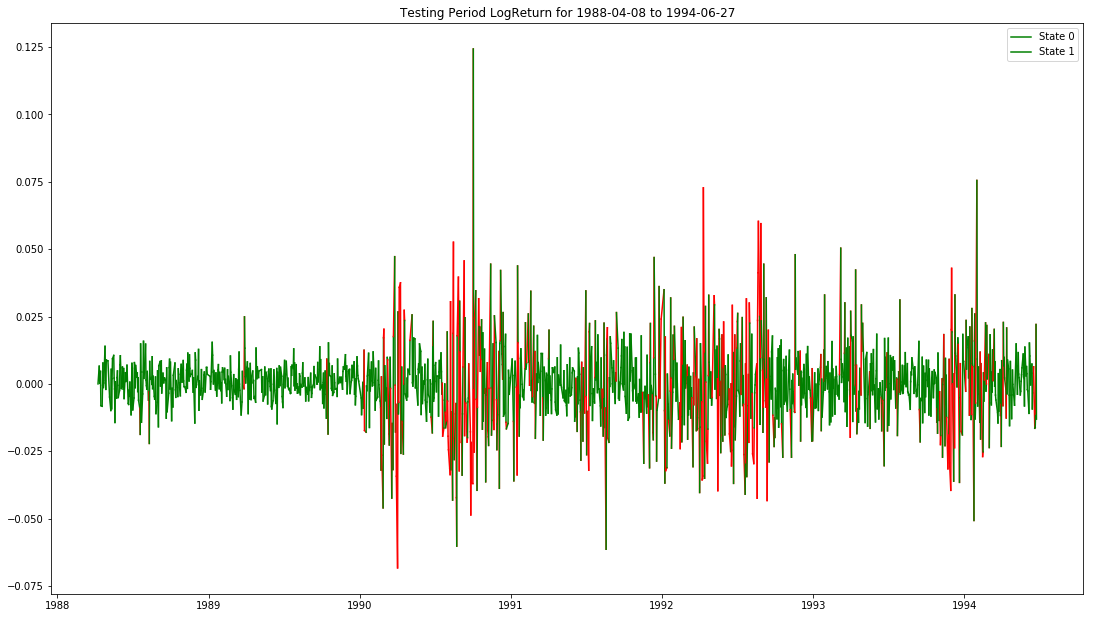

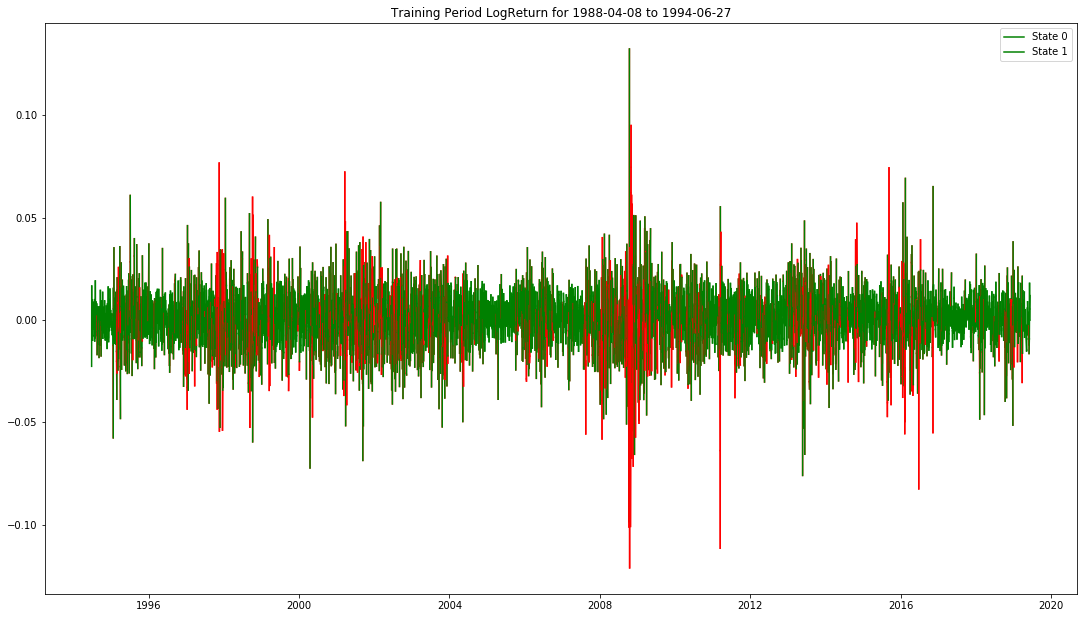

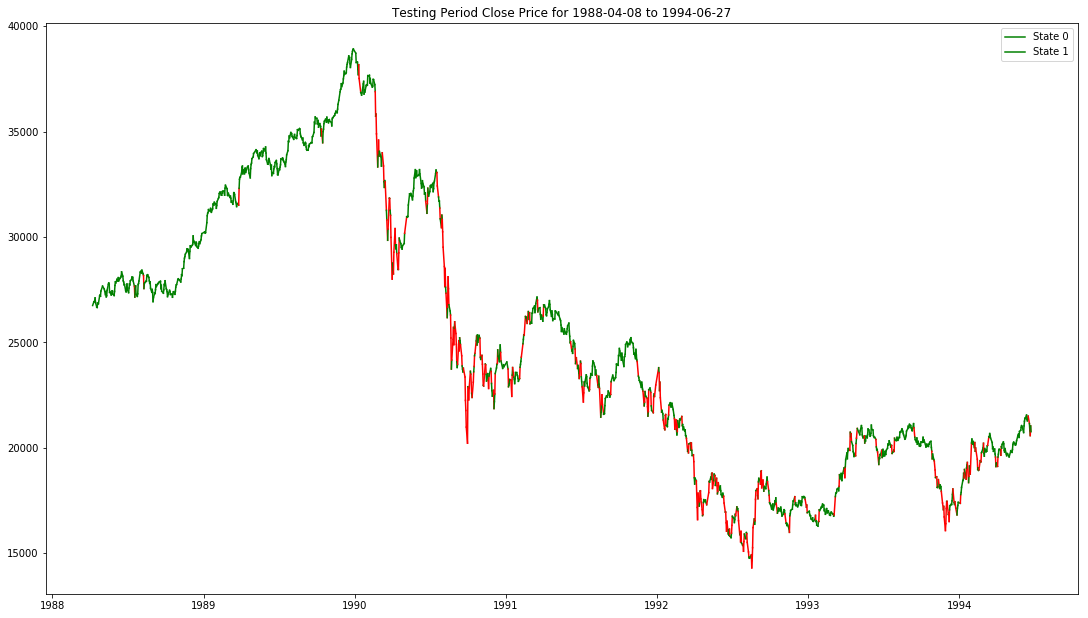

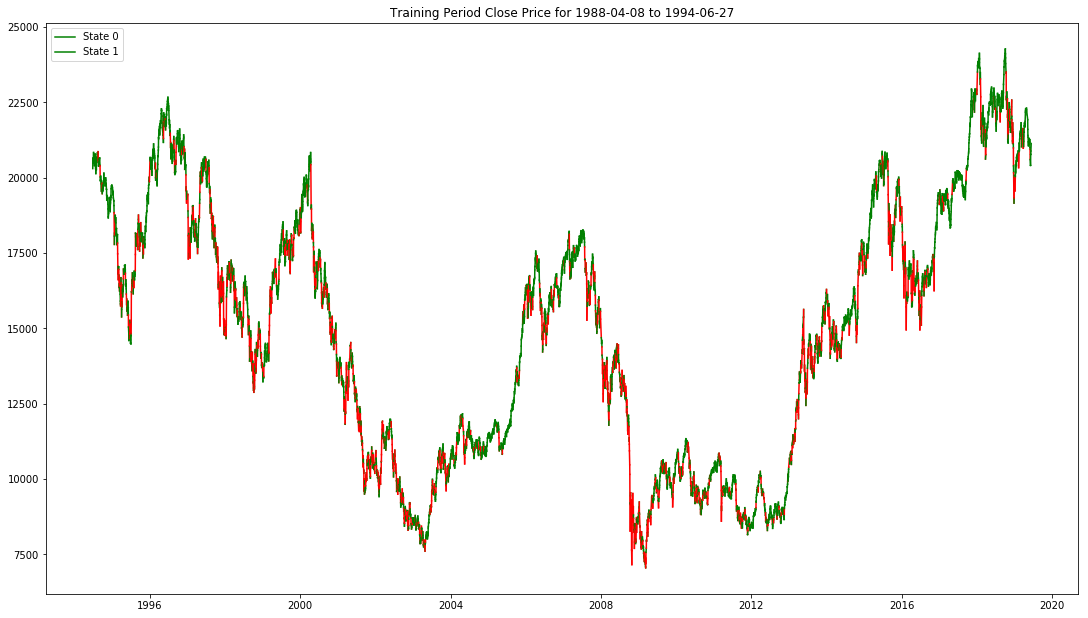

In [9]:
test_p = [0, slices[0]]
ret = structuring_data(test_p, 0)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

testing_0_logret, testing_1_logret = plot_logret(ret, test_p, True, True)
training_0_logret, training_1_logret = plot_logret(ret, test_p, testing=False, return_series=True)
testing_0_close, testing_1_close = plot_close(ret, test_p, True, True)
training_0_close, training_1_close = plot_close(ret, test_p, False, True)

In [10]:
(np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret))

(-0.004015419656073445,
 0.0009292941498309267,
 0.0006004516382784463,
 5.9357396016830556e-05)

In [11]:
(np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret))

(-0.004660420255688982,
 0.0008834959326644555,
 0.0010014860215604084,
 7.094616482670102e-05)

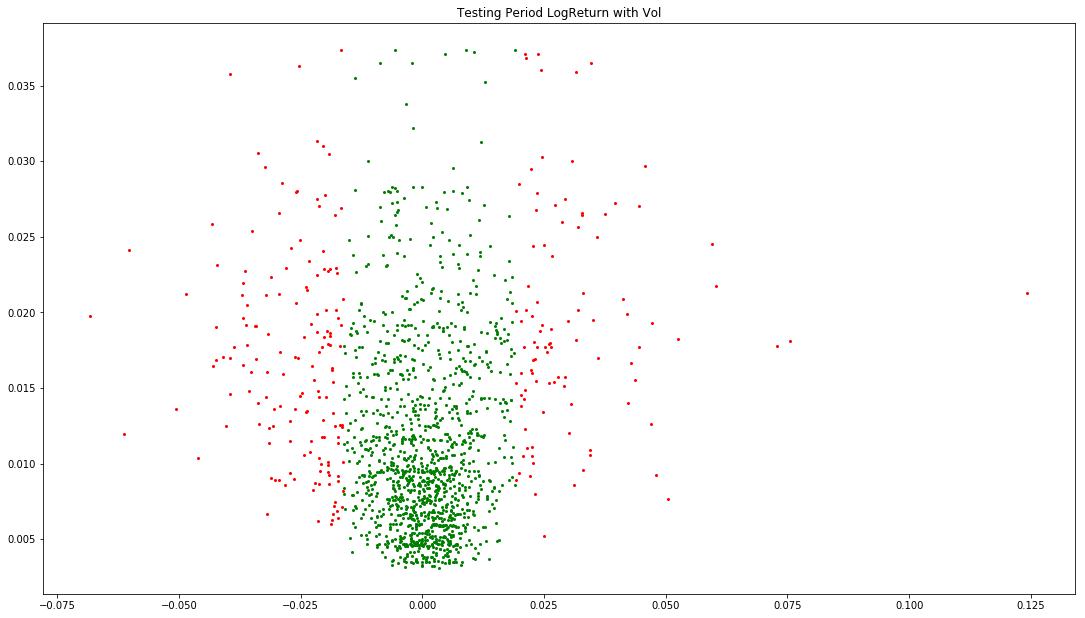

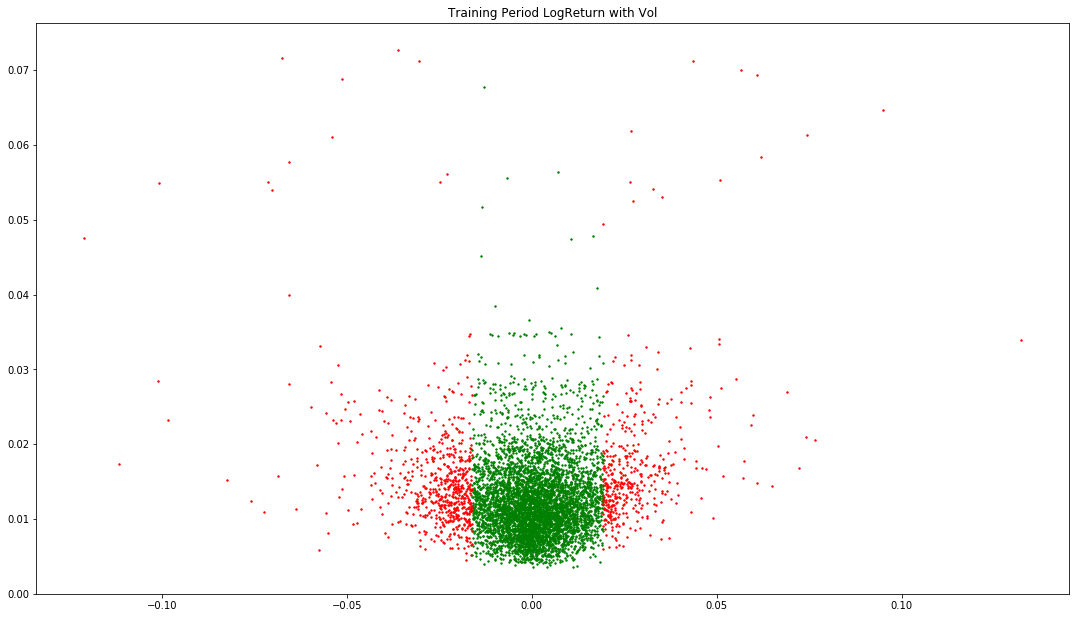

<module 'matplotlib.pyplot' from 'C:\\Users\\Lance\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [12]:
highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)

## Testing Period 1994-06-27 to 2000-09-06

Training Period Variances:
[0.00053029]
[0.00008737]
Score for test: 2.8810635882331583
Score for training: 2.8630784805401817
States 1: 220. States 2: 1312.
The means of state 0:
[-0.00191562]
The means of state 1:
[0.00081705]
1532 1532
6130 6130 6130 6130 1532 1532 1532 1532
The Testing Period is 1994-06-27 to 2000-09-06.
For testing period:
Dates in state 1: 220 Dates in state 2: 1312


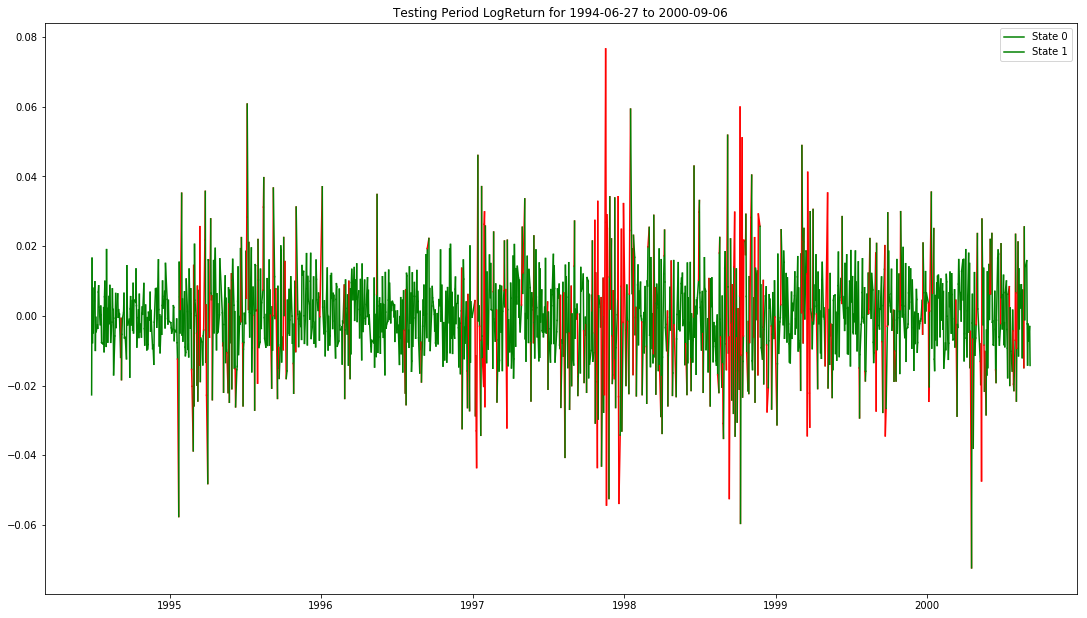

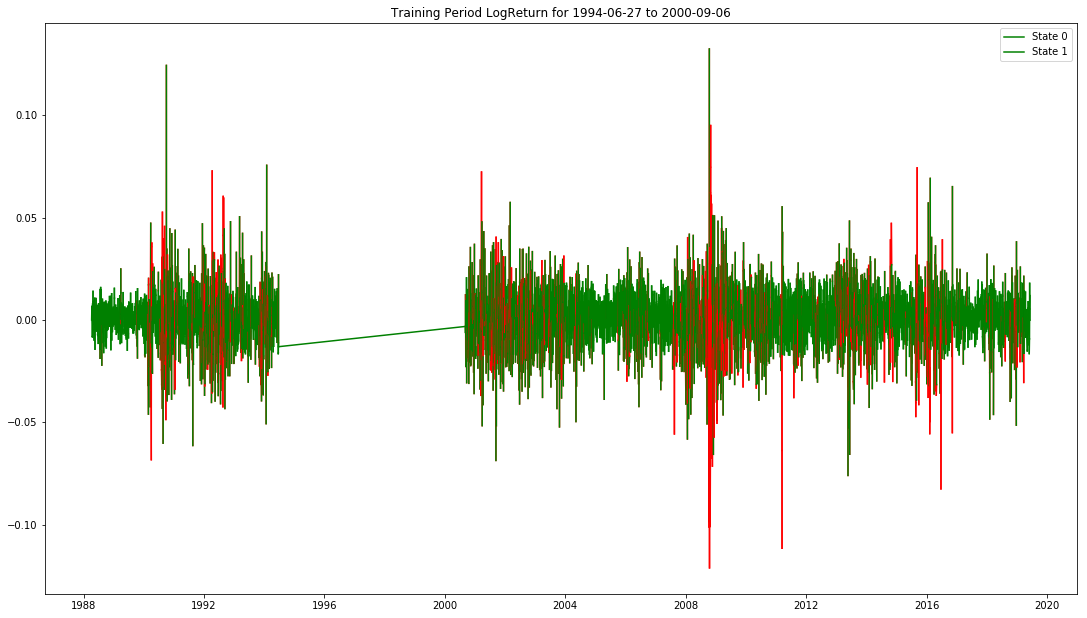

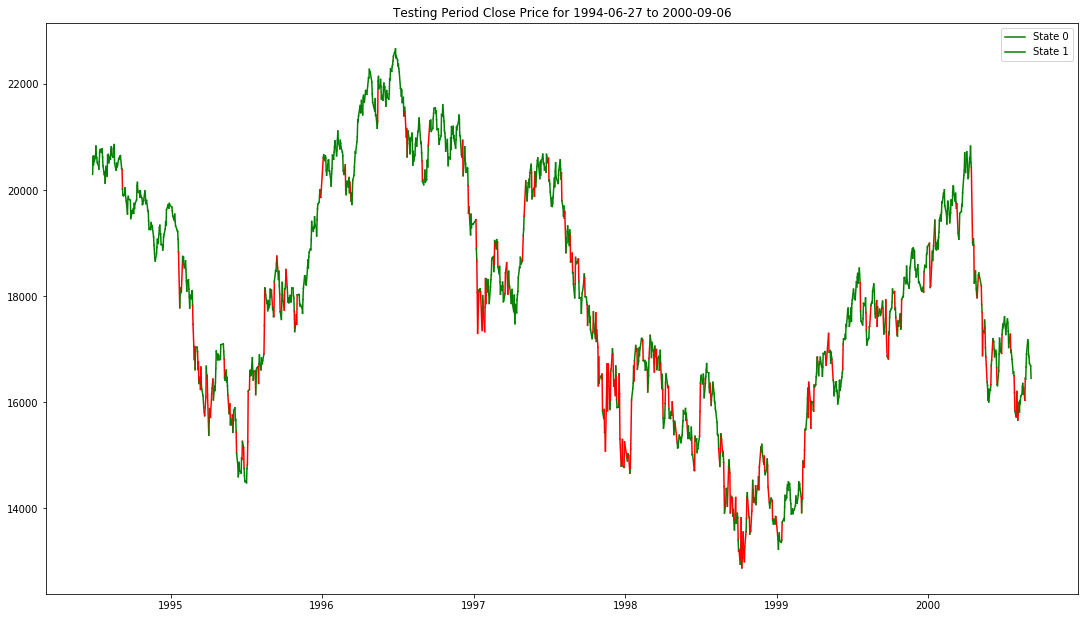

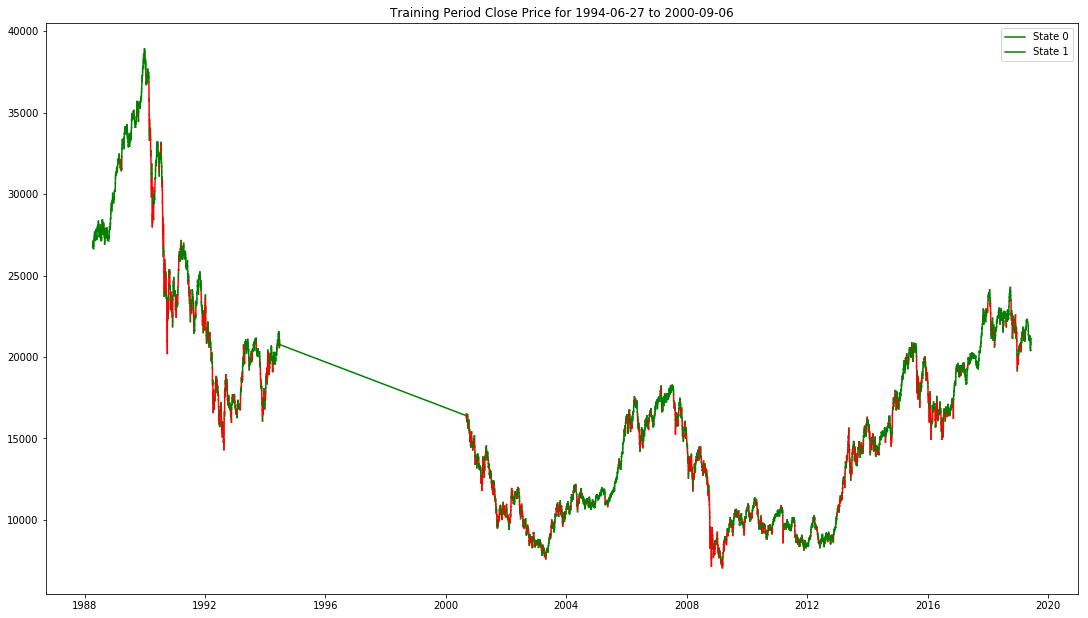

In [13]:
wind = 0
test_p = [slices[0], slices[1]]
ret = structuring_data(test_p, wind)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

testing_0_logret, testing_1_logret = plot_logret(ret, test_p, True, True)
training_0_logret, training_1_logret = plot_logret(ret, test_p, testing=False, return_series=True)
testing_0_close, testing_1_close = plot_close(ret, test_p, True, True)
training_0_close, training_1_close = plot_close(ret, test_p, False, True)

In [14]:
(np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret))

(-0.003650149171523794,
 0.0008992444589664976,
 0.0004490685060170688,
 7.883170637660664e-05)

In [15]:
(np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret))

(-0.005174077170053723,
 0.0010095025627887039,
 0.000910977268425197,
 7.592249472838499e-05)

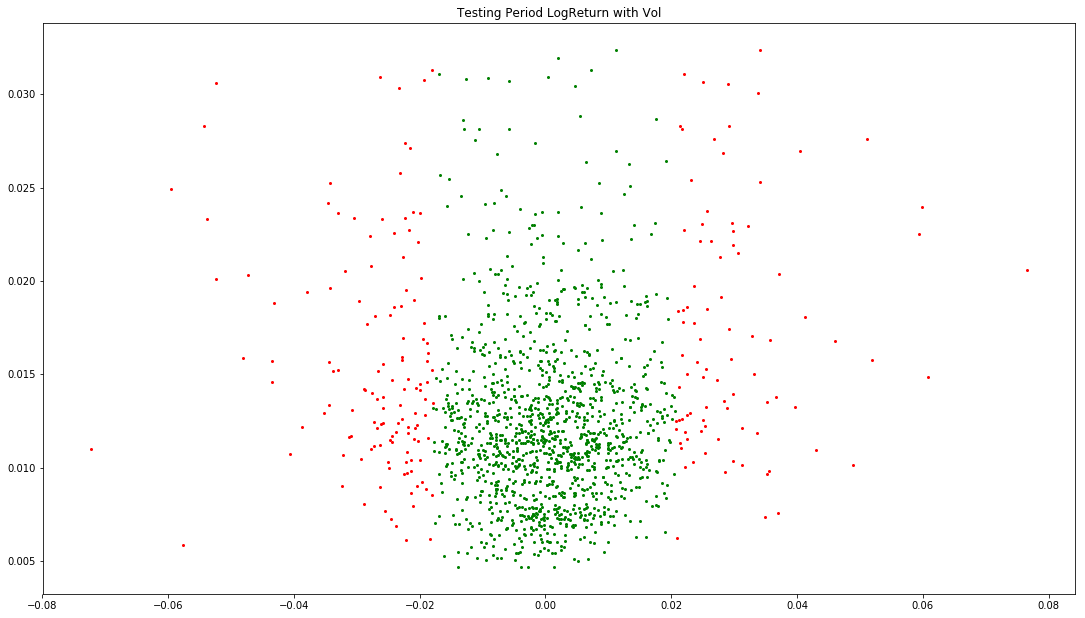

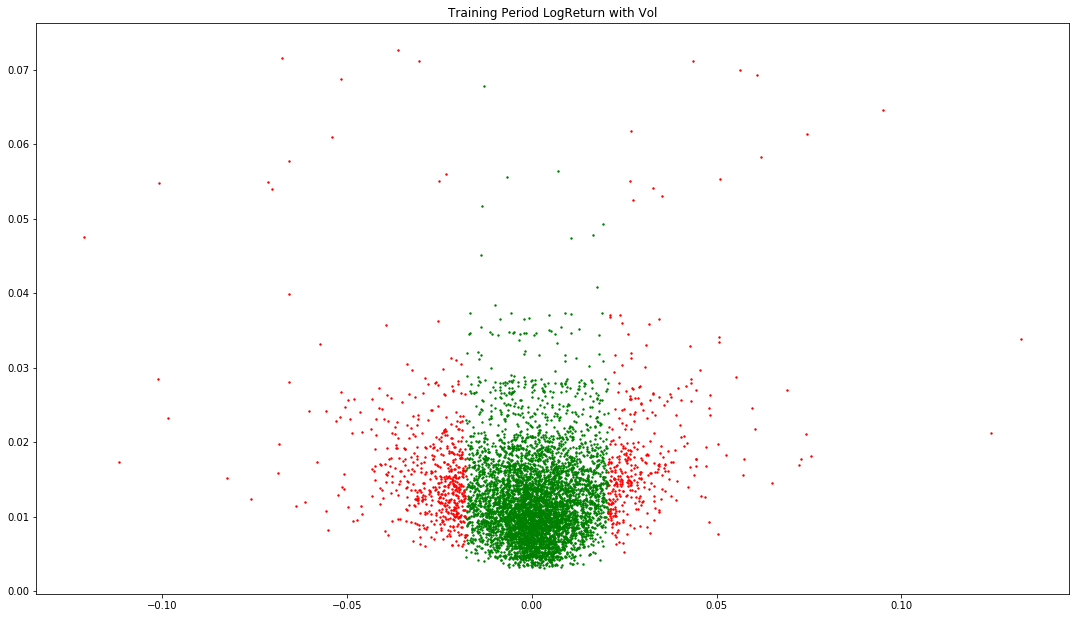

<module 'matplotlib.pyplot' from 'C:\\Users\\Lance\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [16]:
highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)

## Testing Period 2000-09-06 to 2006-11-30

Training Period Variances:
[0.00008305]
[0.00054245]
Score for test: 2.8449031175609796
Score for training: 2.8720189579569704
States 1: 1278. States 2: 255.
The means of state 0:
[0.00066037]
The means of state 1:
[-0.00166958]
1533 1533
6129 6129 6129 6129 1533 1533 1533 1533
The Testing Period is 2000-09-06 to 2006-11-30.
For testing period:
Dates in state 1: 1278 Dates in state 2: 255


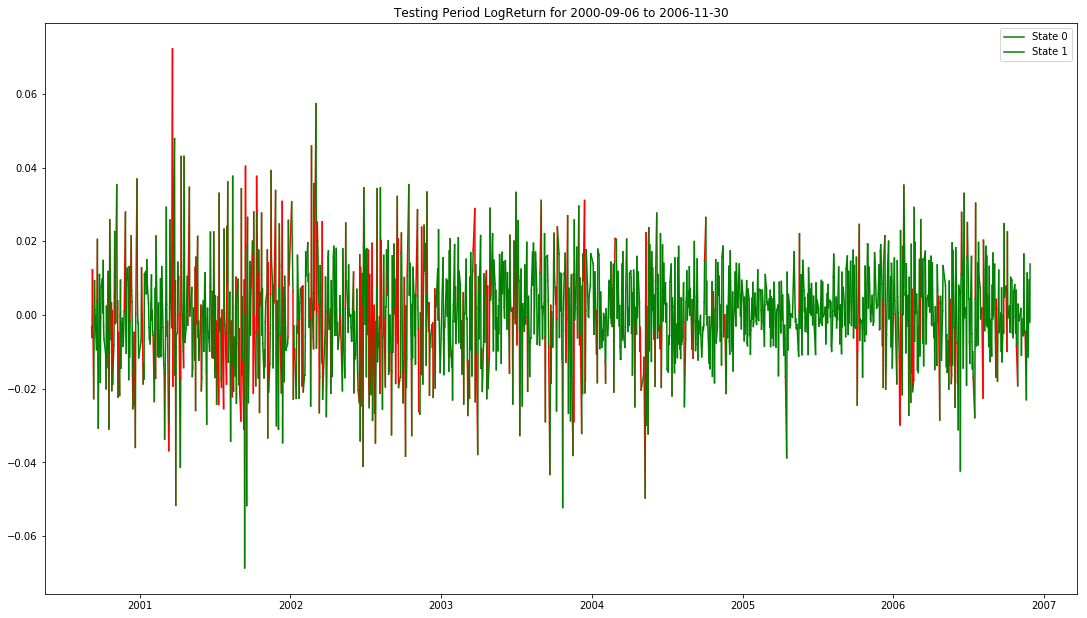

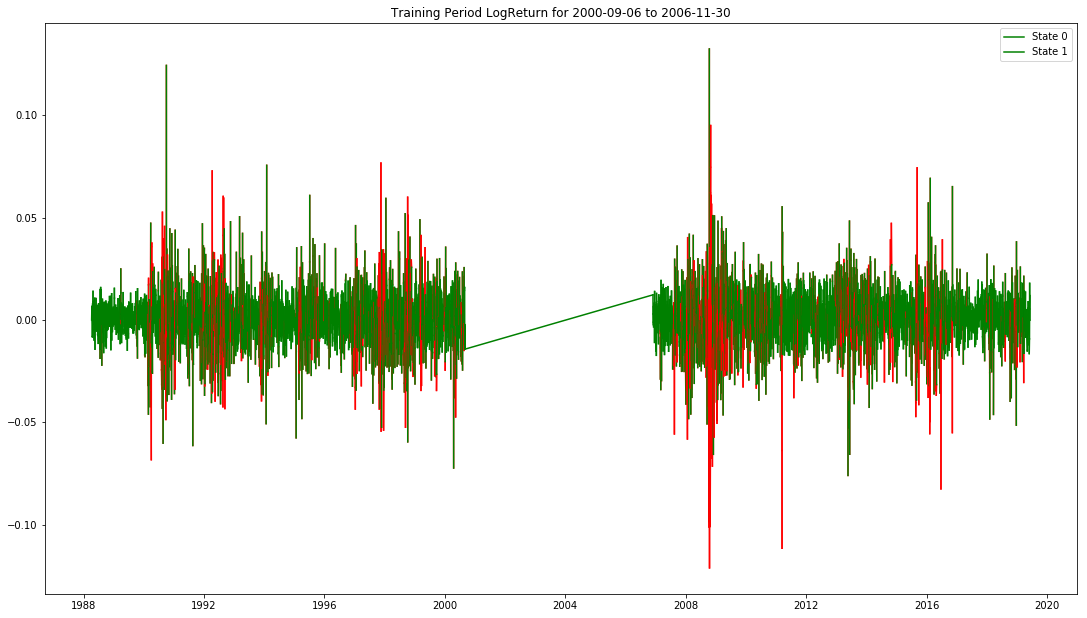

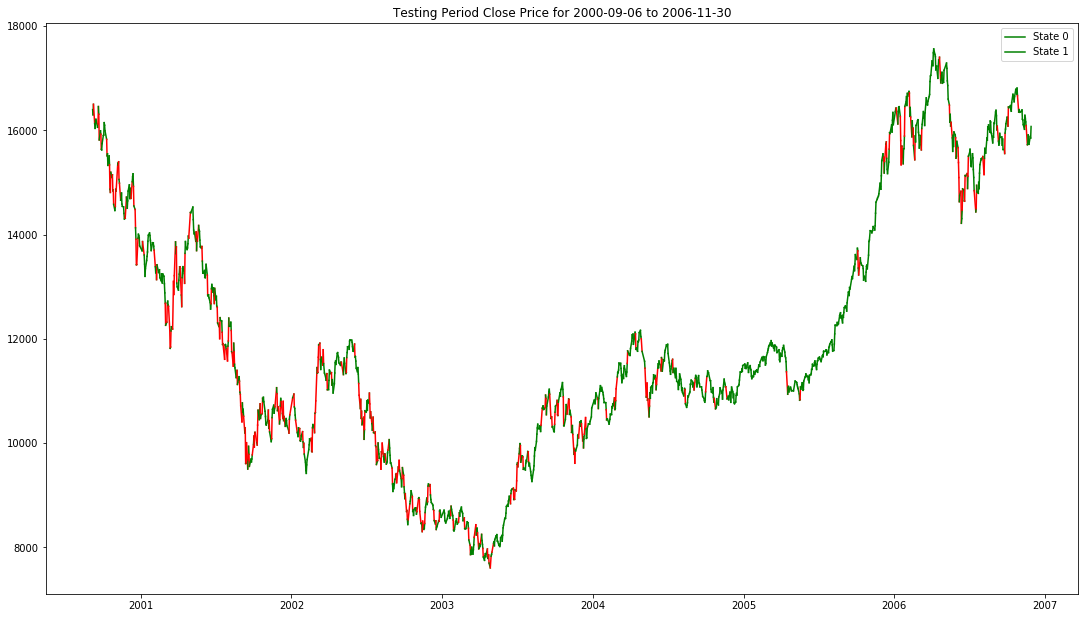

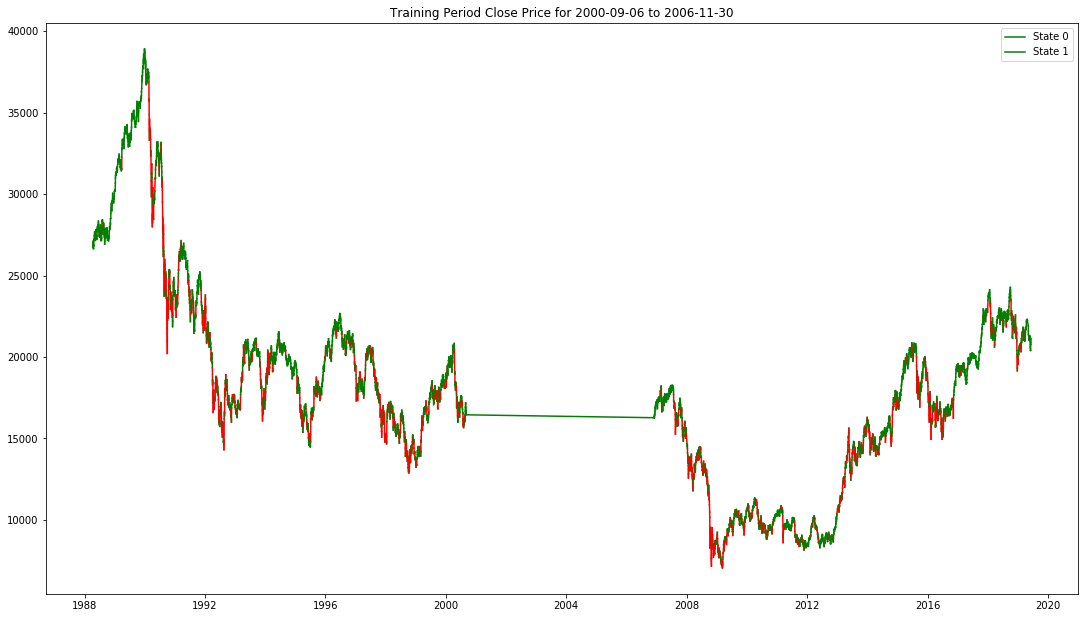

In [17]:
test_p = [slices[1], slices[2]]
ret = structuring_data(test_p, 0)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

testing_0_logret, testing_1_logret = plot_logret(ret, test_p, True, True)
training_0_logret, training_1_logret = plot_logret(ret, test_p, testing=False, return_series=True)
testing_0_close, testing_1_close = plot_close(ret, test_p, True, True)
training_0_close, training_1_close = plot_close(ret, test_p, False, True)

In [18]:
np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret)

(-0.004078649970568087,
 0.000765945315980718,
 0.0007988428476498516,
 8.233226682259475e-05)

In [19]:
np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret)

(-0.004177680936748538,
 0.0010262013928035183,
 0.0007065749829815147,
 7.245083459291939e-05)

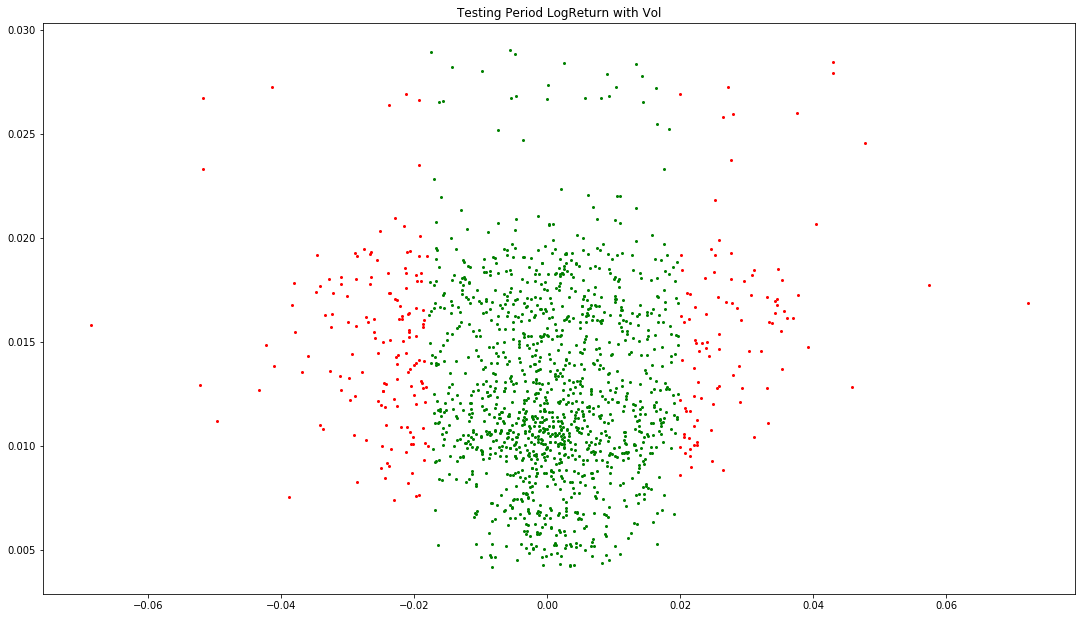

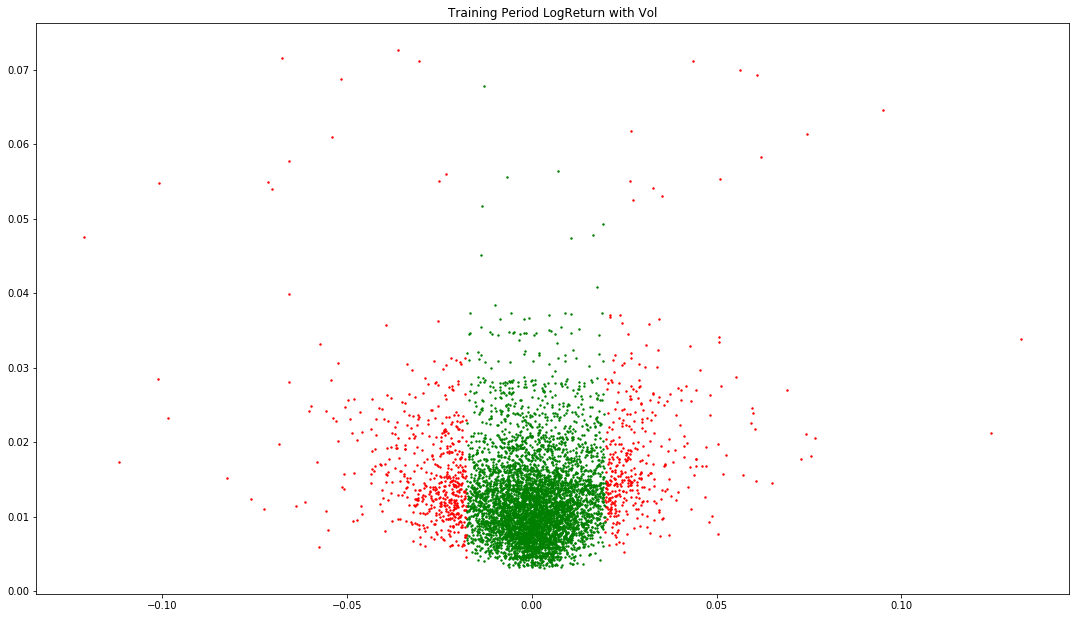

<module 'matplotlib.pyplot' from 'C:\\Users\\Lance\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)

## Testing Period 2006-11-30 to 2013-03-07

Training Period Variances:
[0.00007331]
[0.0004011]
Score for test: 2.705201469857656
Score for training: 2.9033699732252876
States 1: 1137. States 2: 395.
The means of state 0:
[0.00065945]
The means of state 1:
[-0.001071]
1532 1532
6130 6130 6130 6130 1532 1532 1532 1532
The Testing Period is 2006-11-30 to 2013-03-07.
For testing period:
Dates in state 1: 1137 Dates in state 2: 395


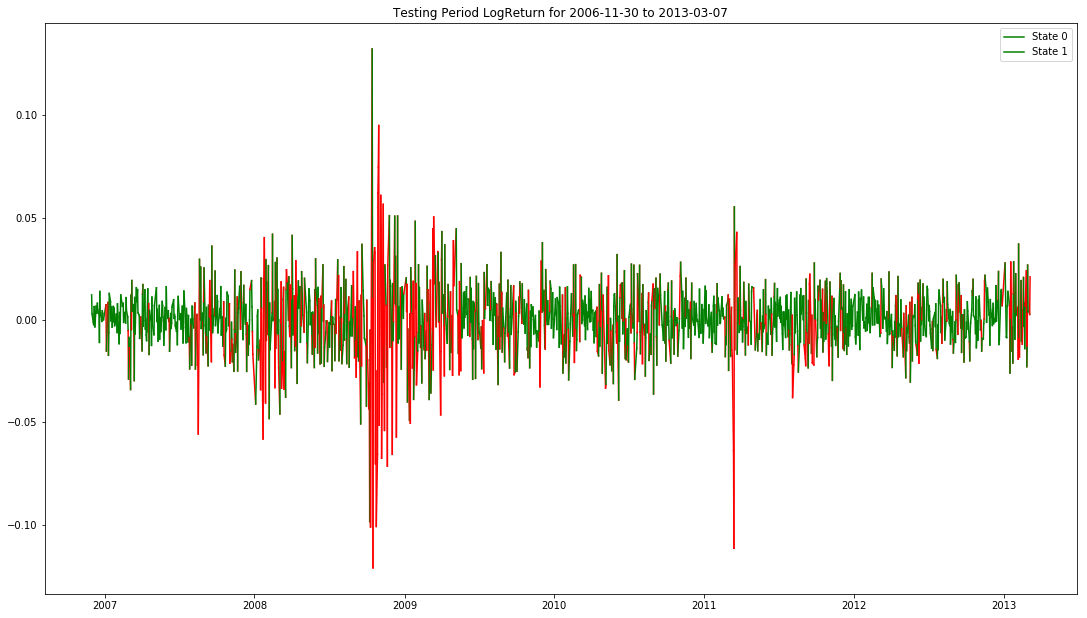

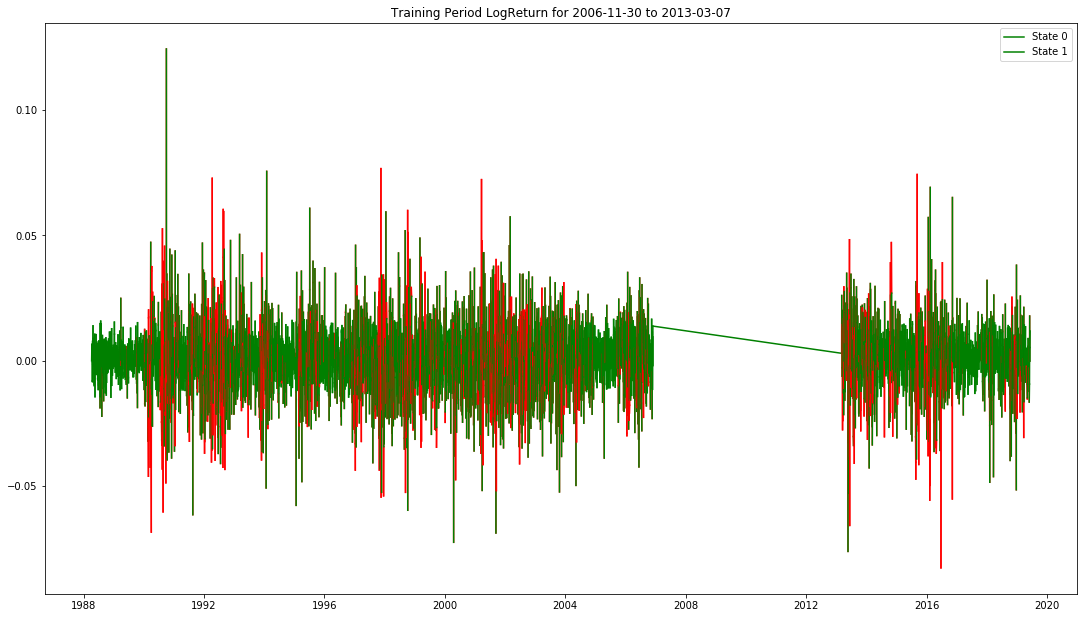

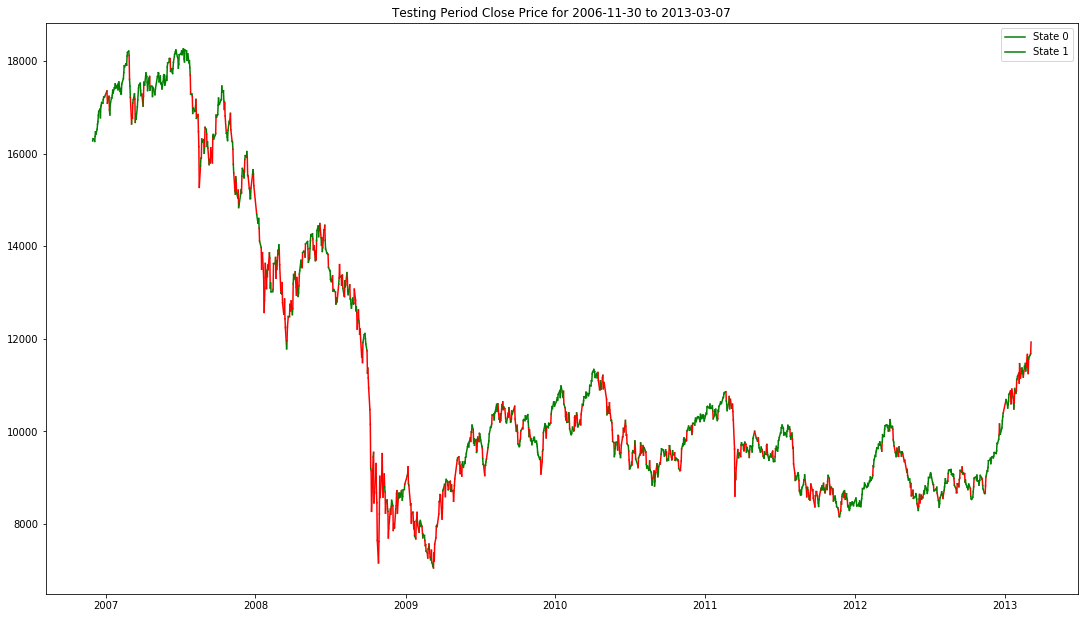

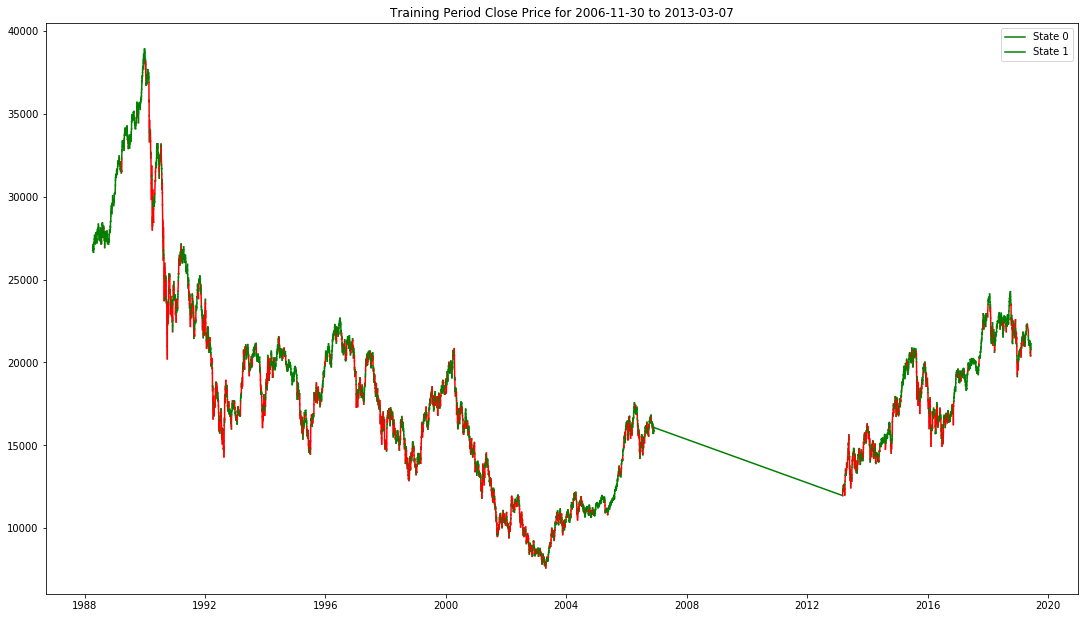

In [21]:
test_p = [slices[2], slices[3]]
ret = structuring_data(test_p, 0)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

testing_0_logret, testing_1_logret = plot_logret(ret, test_p, True, True)
training_0_logret, training_1_logret = plot_logret(ret, test_p, testing=False, return_series=True)
testing_0_close, testing_1_close = plot_close(ret, test_p, True, True)
training_0_close, training_1_close = plot_close(ret, test_p, False, True)

In [22]:
np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret)


(-0.003398059905023973,
 0.0009556033500456158,
 0.0009083548355607858,
 6.228432780398314e-05)

In [23]:
np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret)

(-0.002565047211368492,
 0.0007218731128984707,
 0.0006893193493543889,
 5.514485667148841e-05)

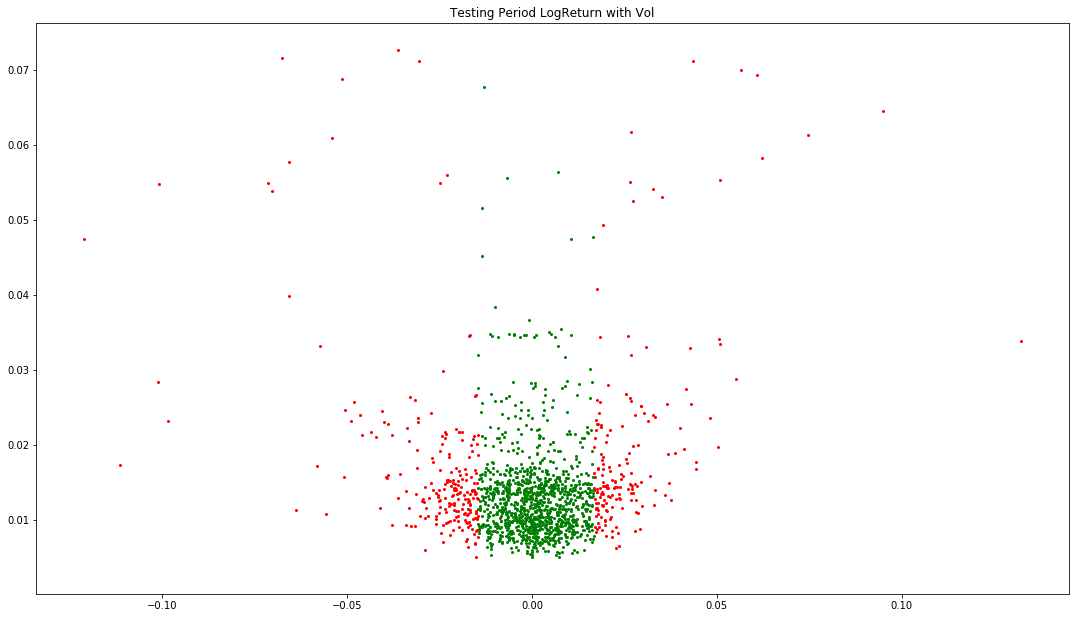

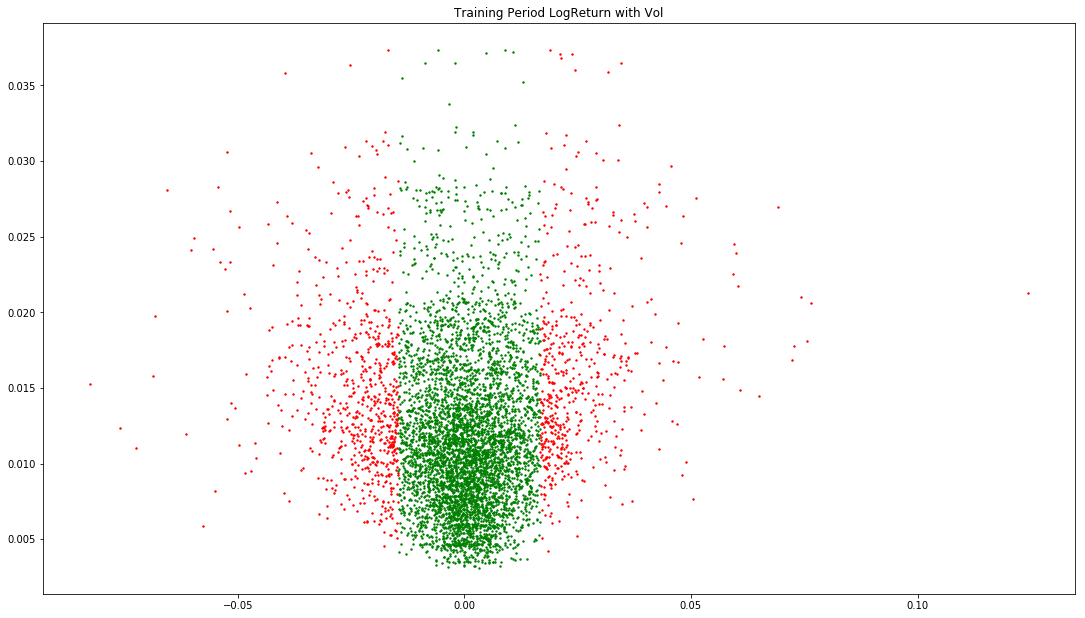

<module 'matplotlib.pyplot' from 'C:\\Users\\Lance\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [24]:
highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)

## Testing Period 2013-03-7 to 2019-06-10

Training Period Variances:
[0.00047083]
[0.00008614]
Score for test: 2.960361545085412
Score for training: 2.840740897677572
States 1: 224. States 2: 1308.
The means of state 0:
[-0.00119409]
The means of state 1:
[0.0004746]
1532 1532
6130 6130 6130 6130 1532 1532 1532 1532
The Testing Period is 2013-03-07 to 2019-06-10.
For testing period:
Dates in state 1: 224 Dates in state 2: 1308


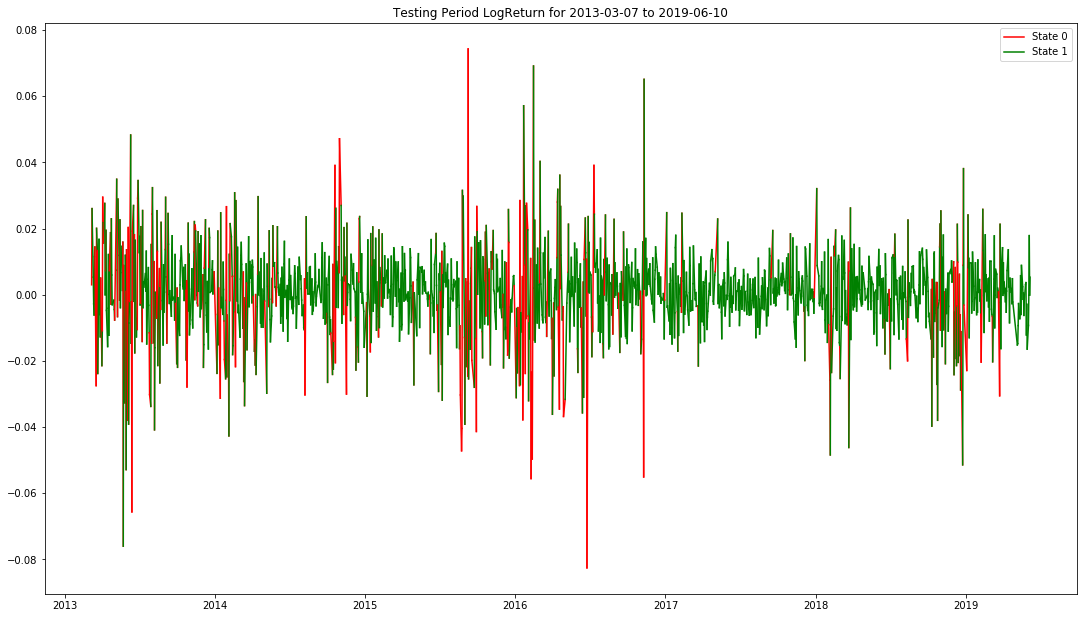

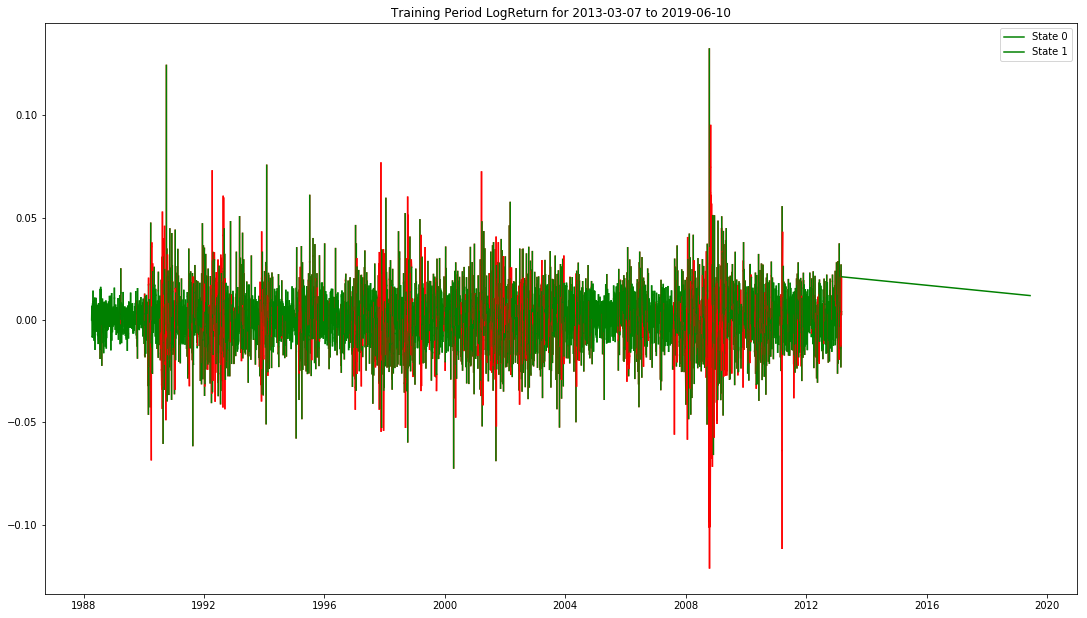

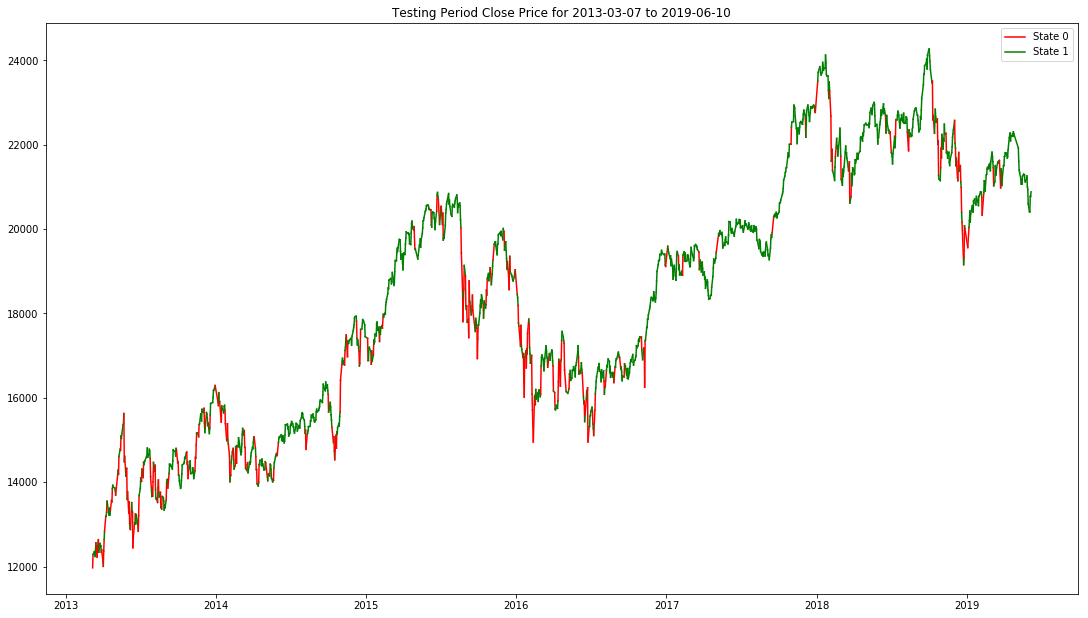

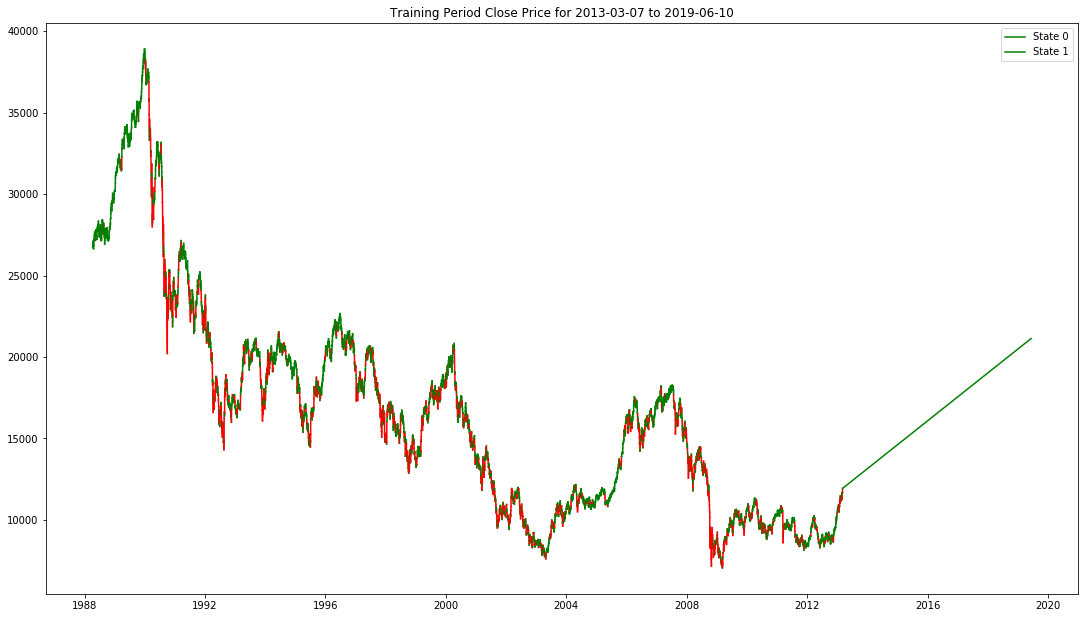

In [25]:
test_p = [slices[3], slices[4]]
ret = structuring_data(test_p, 0)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

testing_0_logret, testing_1_logret = plot_logret(ret, test_p, True, True)
training_0_logret, training_1_logret = plot_logret(ret, test_p, testing=False, return_series=True)
testing_0_close, testing_1_close = plot_close(ret, test_p, True, True)
training_0_close, training_1_close = plot_close(ret, test_p, False, True)

In [26]:
(np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret)),

((-0.002910412524794793,
  0.0008699298168331847,
  0.0009247946828899084,
  5.92517454037361e-05),)

In [27]:
(np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret))

(-0.003084620301106625,
 0.0008841959835317782,
 0.0005629682004844462,
 6.810294077395241e-05)

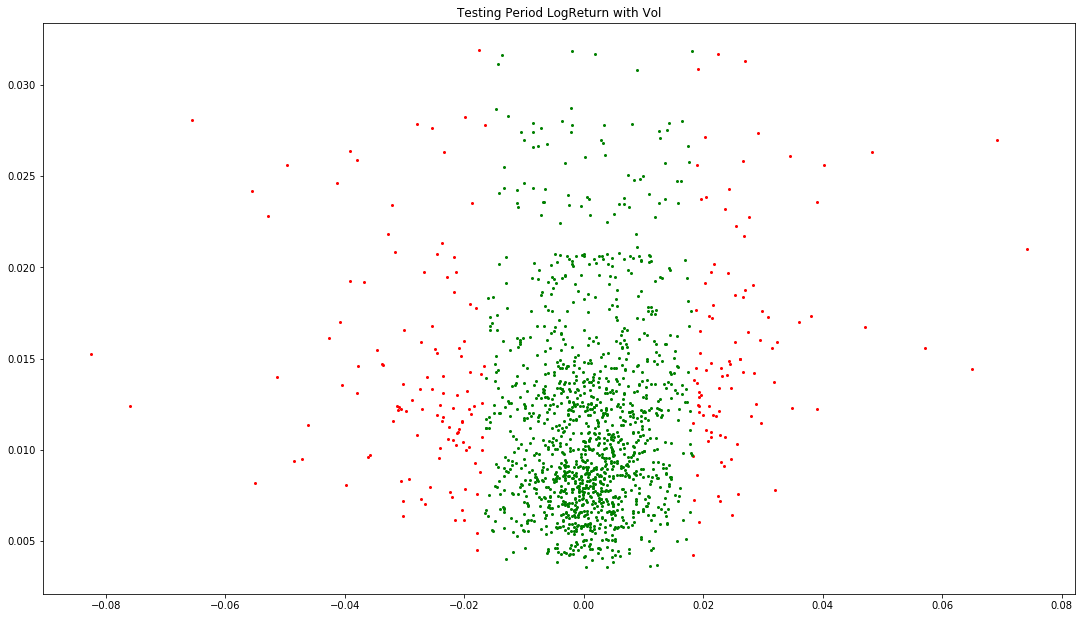

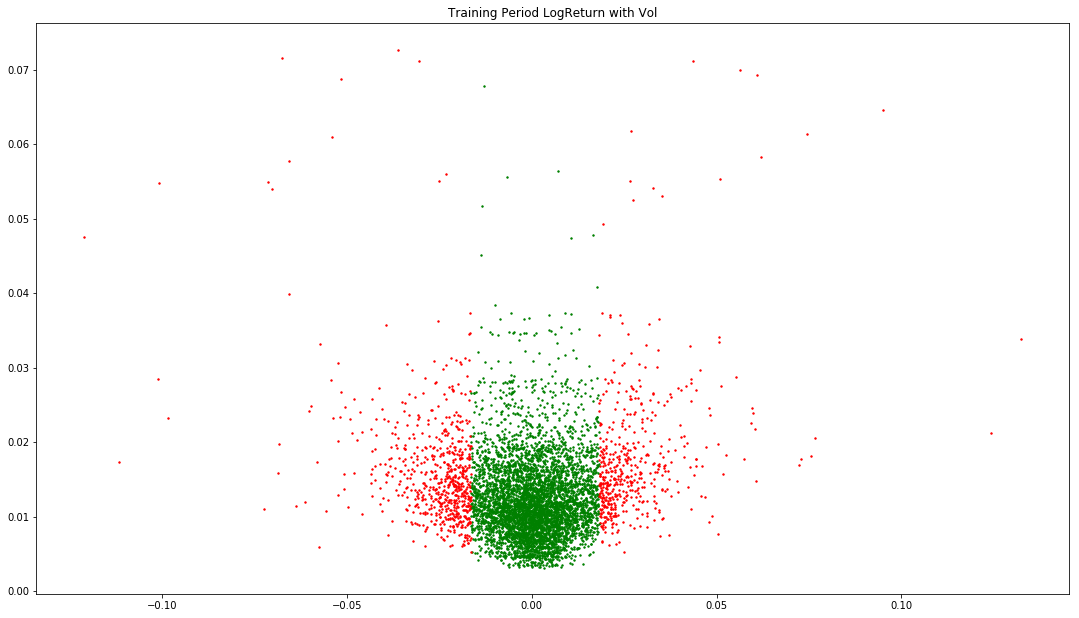

<module 'matplotlib.pyplot' from 'C:\\Users\\Lance\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [28]:
highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)

In [24]:
frame, slices

([18.5, 10.5], [1532, 3064, 4597, 6129, 7661])

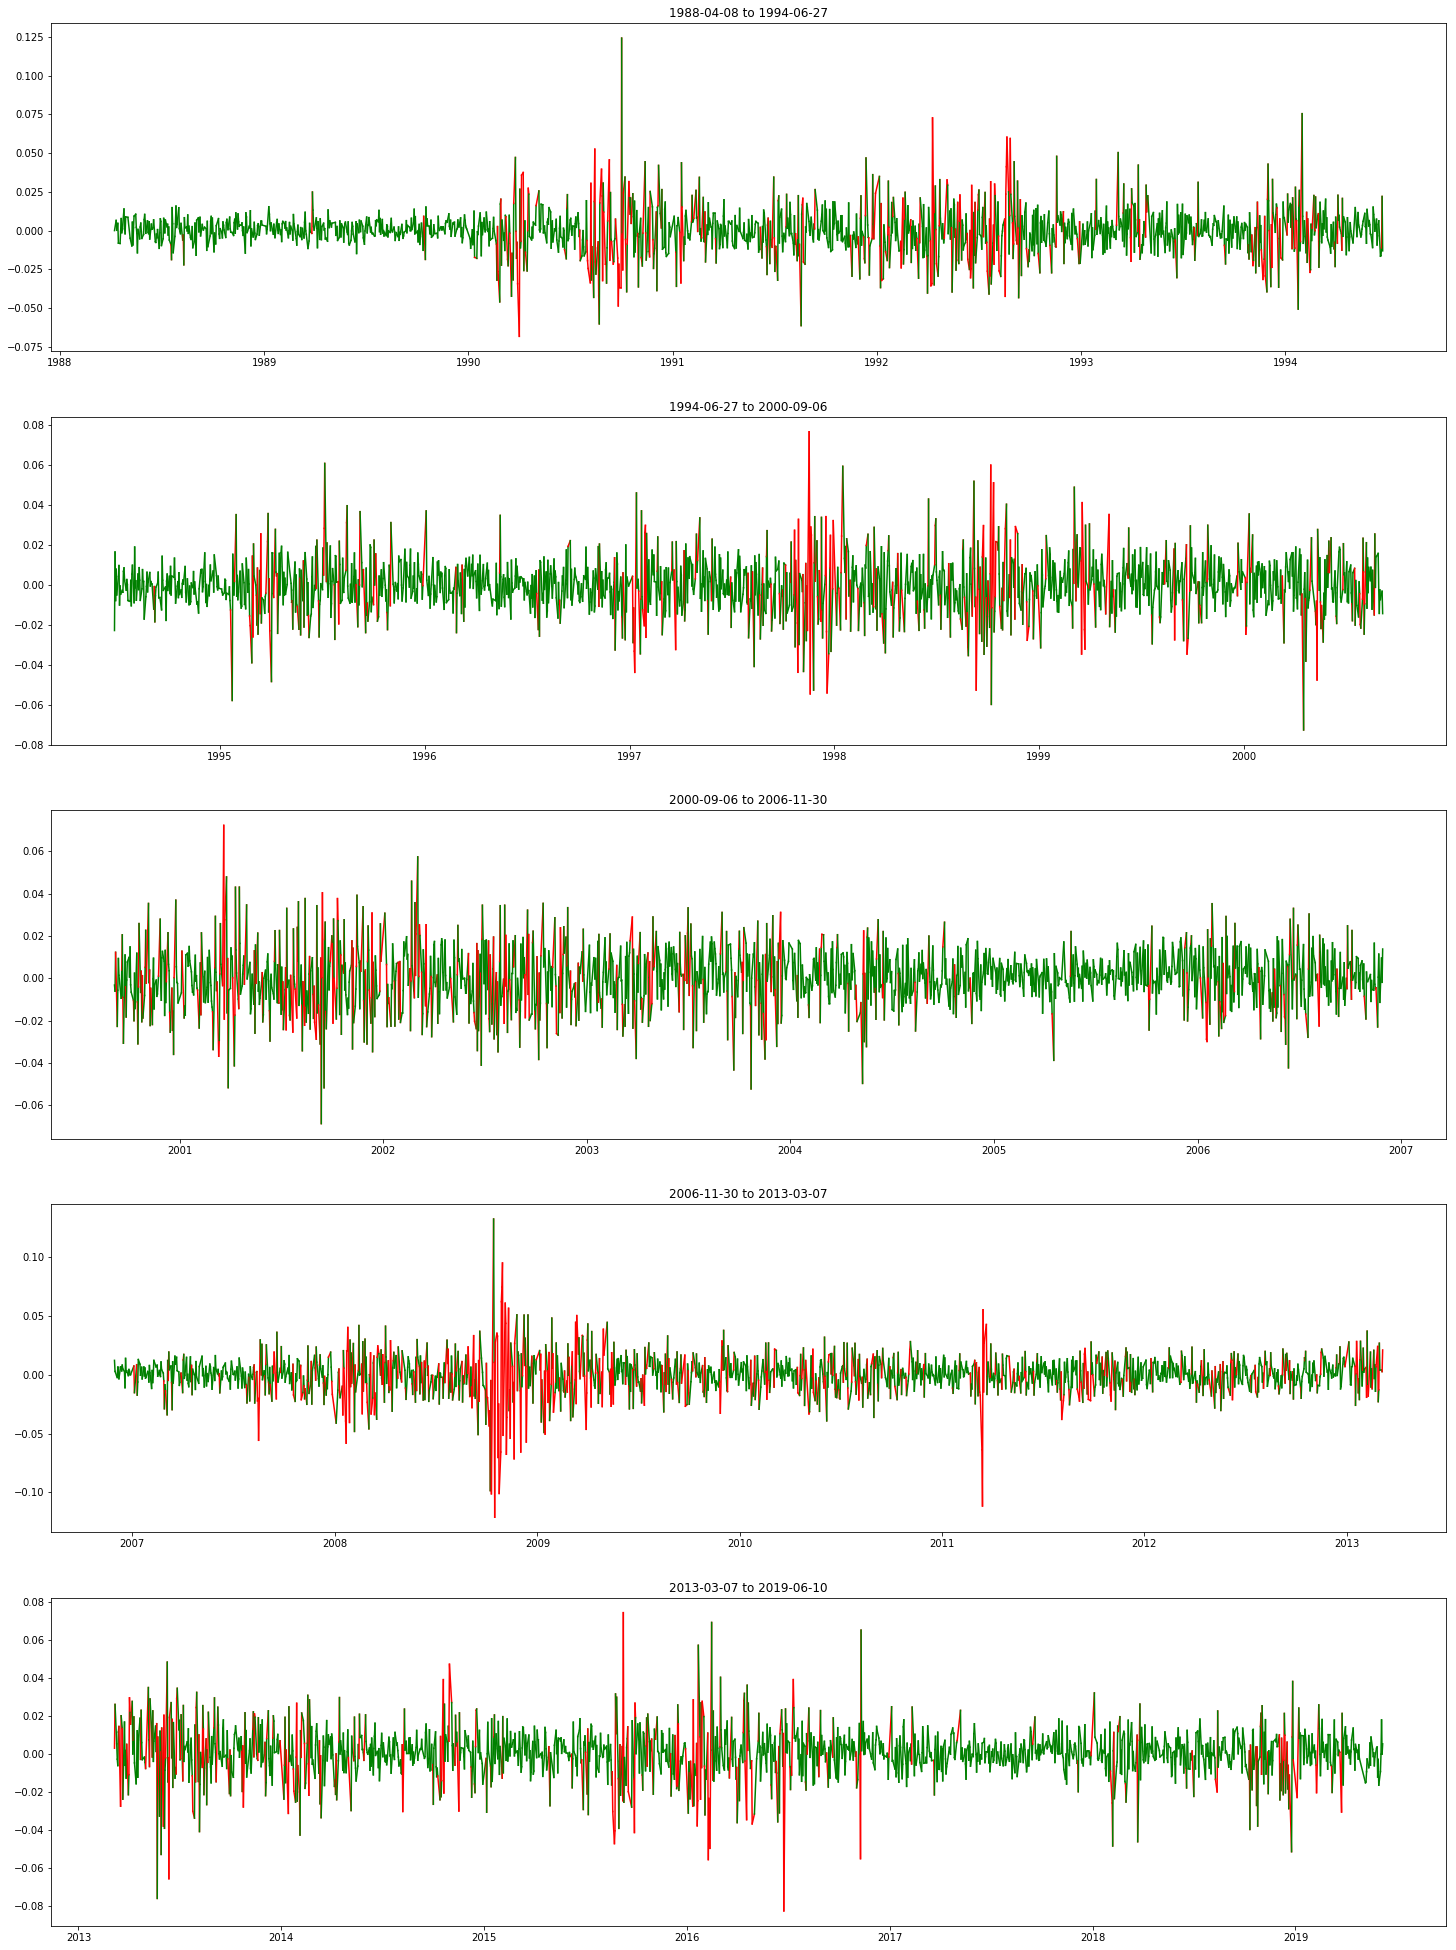

In [25]:
slices = [0, 1532, 3064, 4597, 6129, 7661]
frame = [3.1, 2.1]
#subplots
#plot logreturns testing
fig = plt.figure(figsize = (25, 35))
for i in range(5):
    plt.subplot(5,1,i+1)
    ret = structuring_data([slices[i],slices[i+1]], 0, record = False)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    mark1, mark2, mark3 = 4, 5, 7
    
    for i1 in range(1,len(ret[mark1])):#len(closes)-1):
        if ret[mark1][i1]==highvol_mark:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='r')
        else:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='g')
    
    plt.title('%.10s to %.10s'%(dates[slices[i]],dates[slices[i+1]]))

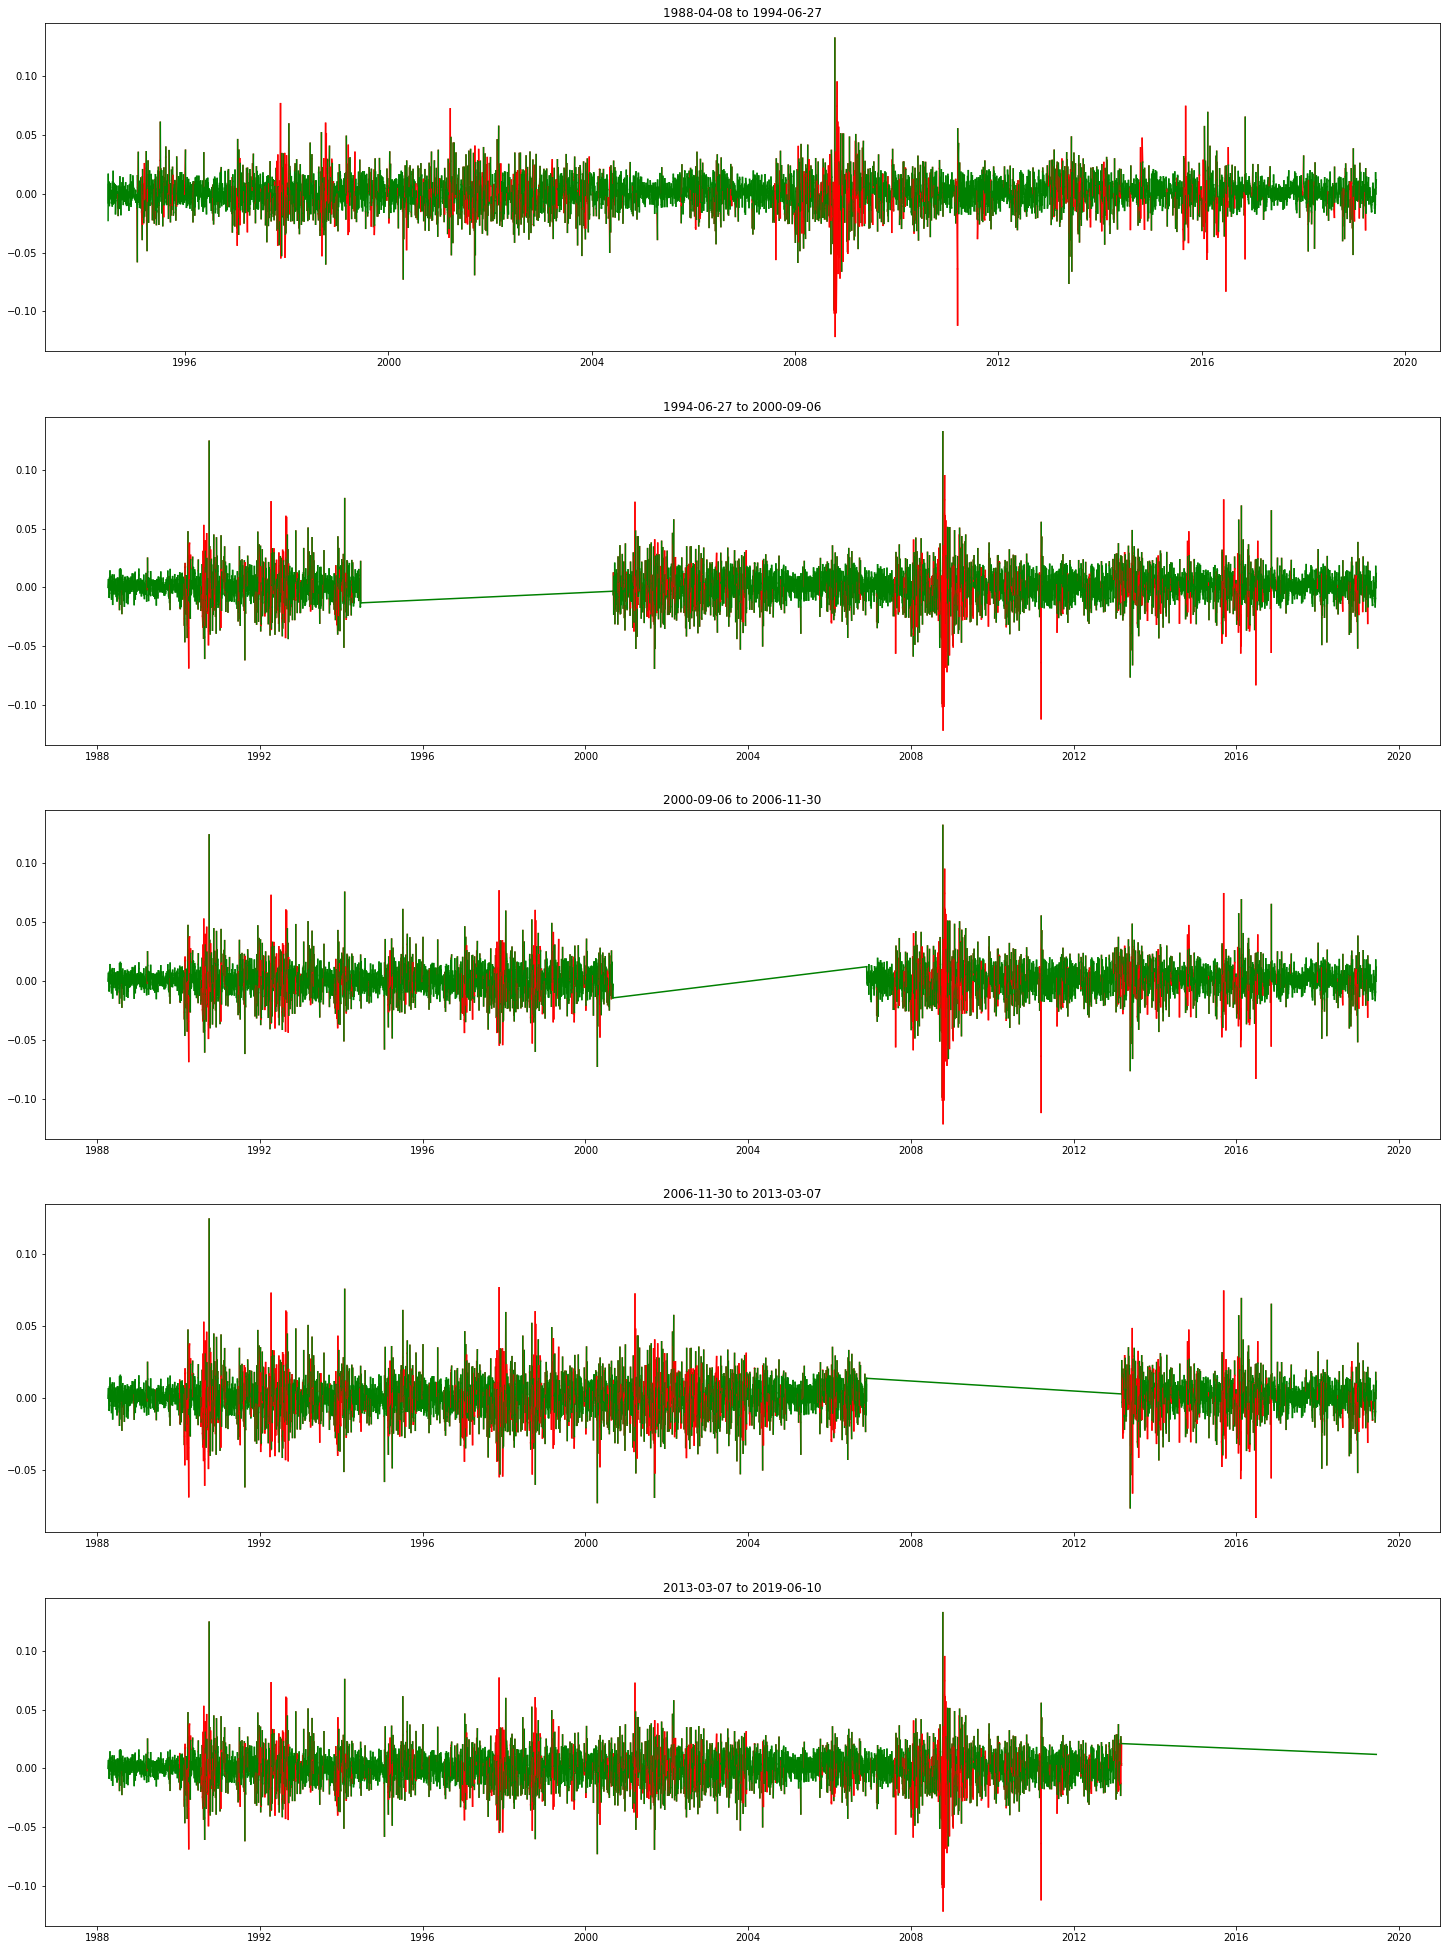

In [26]:
#plot logreturns training
fig = plt.figure(figsize = (25, 35))
for i in range(5):
    plt.subplot(5,1,i+1)
    ret = structuring_data([slices[i],slices[i+1]], 0, record = False)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    mark1, mark2, mark3 = 0, 1, 3
    
    for i1 in range(1,len(ret[mark1])):#len(closes)-1):
        if ret[mark1][i1]==highvol_mark:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='r')
        else:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='g')
    plt.title('%.10s to %.10s'%(dates[slices[i]],dates[slices[i+1]]))


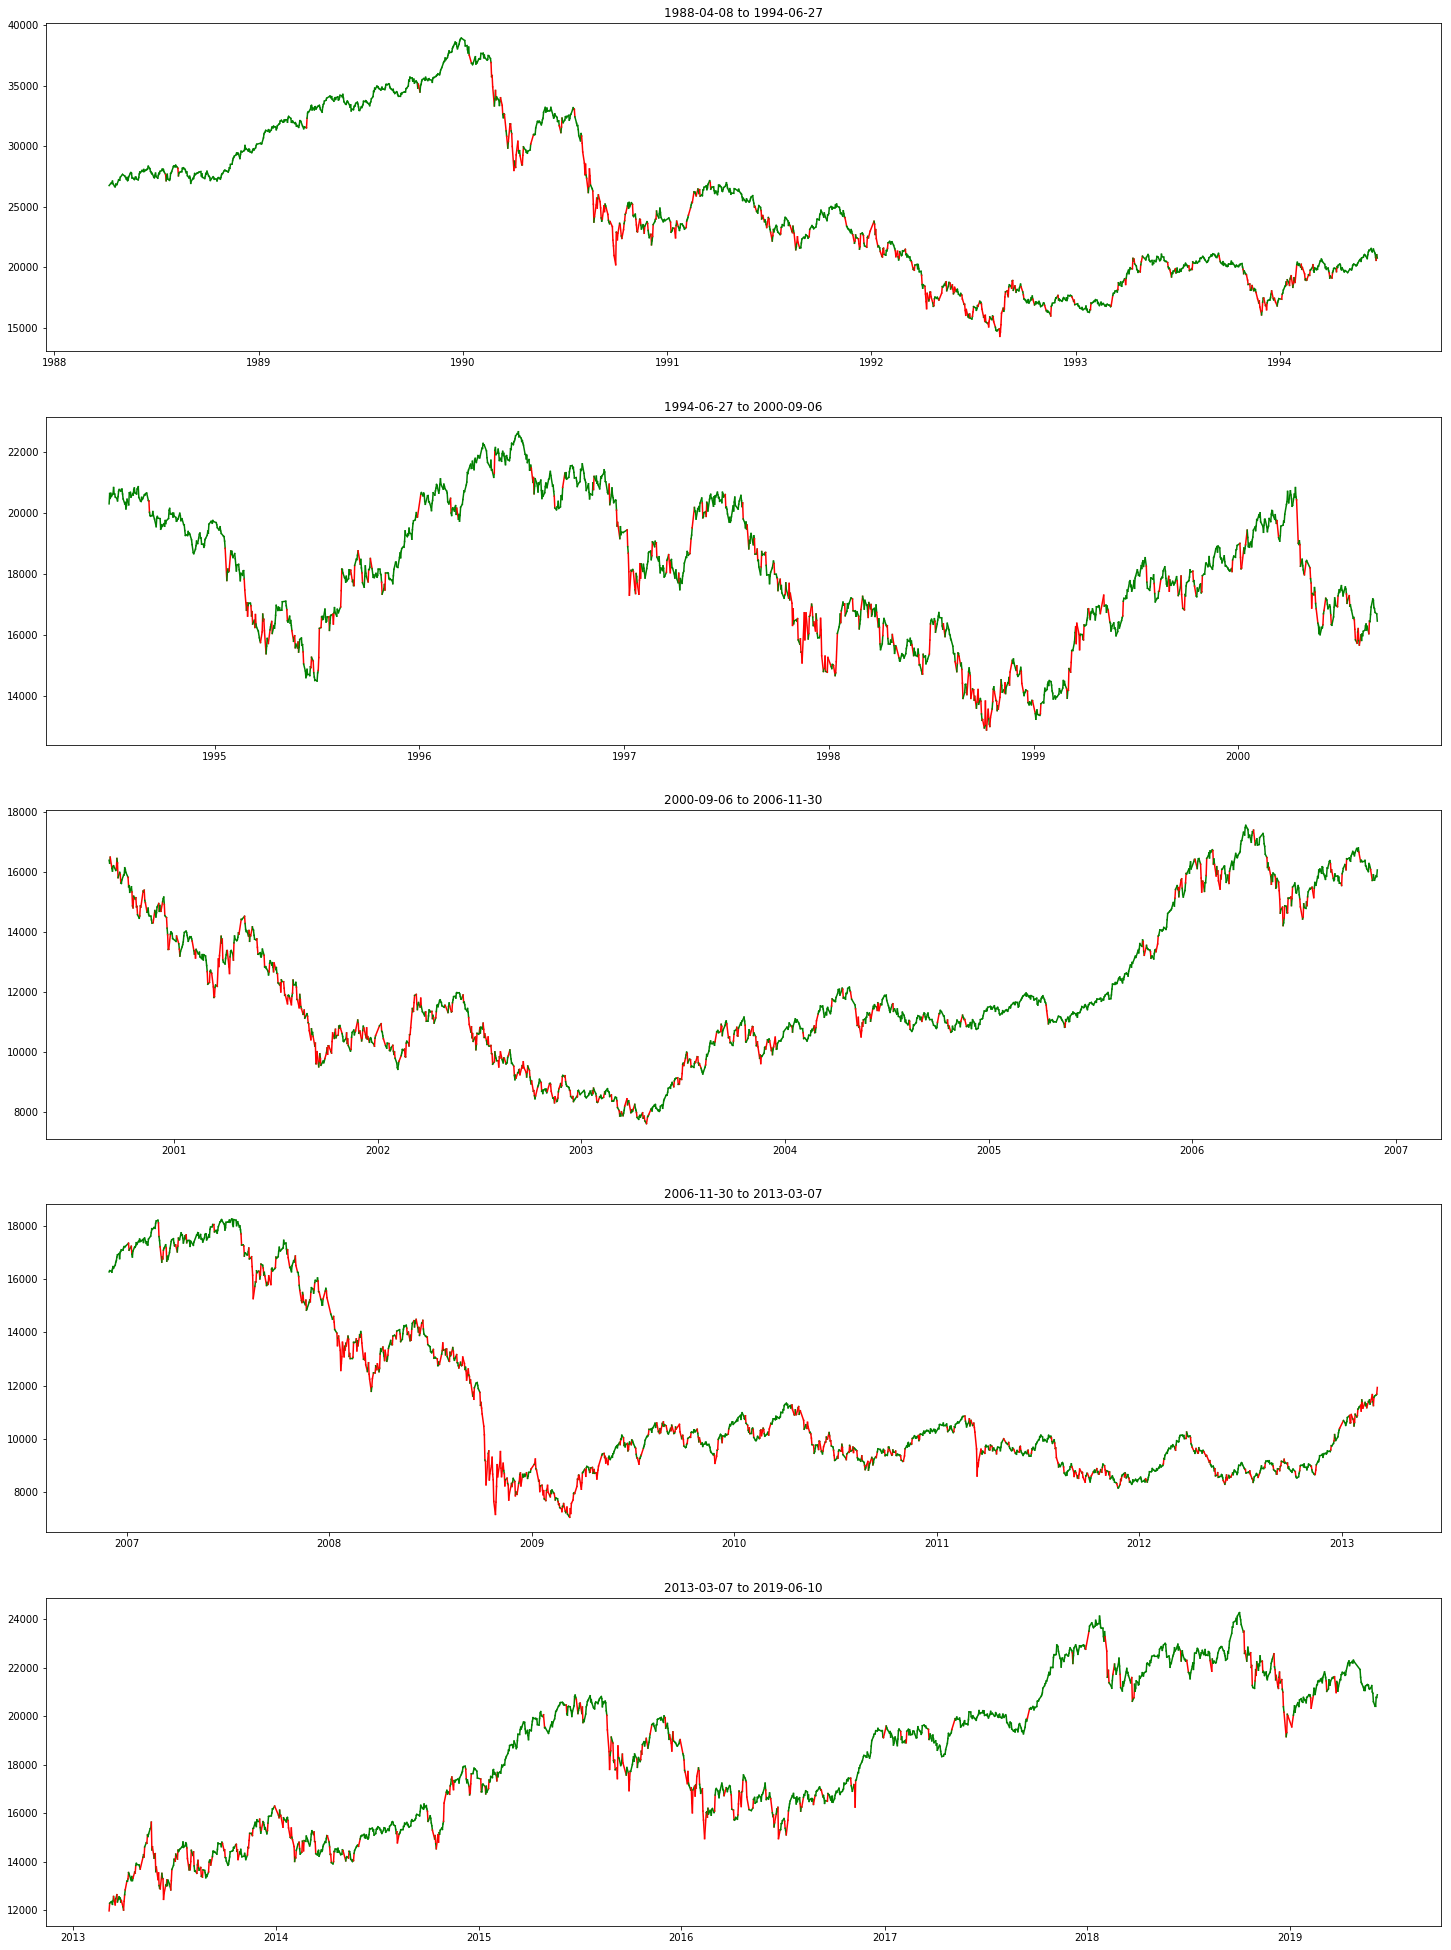

In [27]:
#plot close prices testing
fig = plt.figure(figsize = (25, 35))
for i in range(5):
    plt.subplot(5,1,i+1)
    ret = structuring_data([slices[i],slices[i+1]], 0, record = False)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    mark1, mark2, mark3 = 4, 5, 6
    
    for i1 in range(1,len(ret[mark1])):#len(closes)-1):
        if ret[mark1][i1]==highvol_mark:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='r')
        else:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='g')
    plt.title('%.10s to %.10s'%(dates[slices[i]],dates[slices[i+1]]))


Done!
Done!
Done!
Done!
Done!


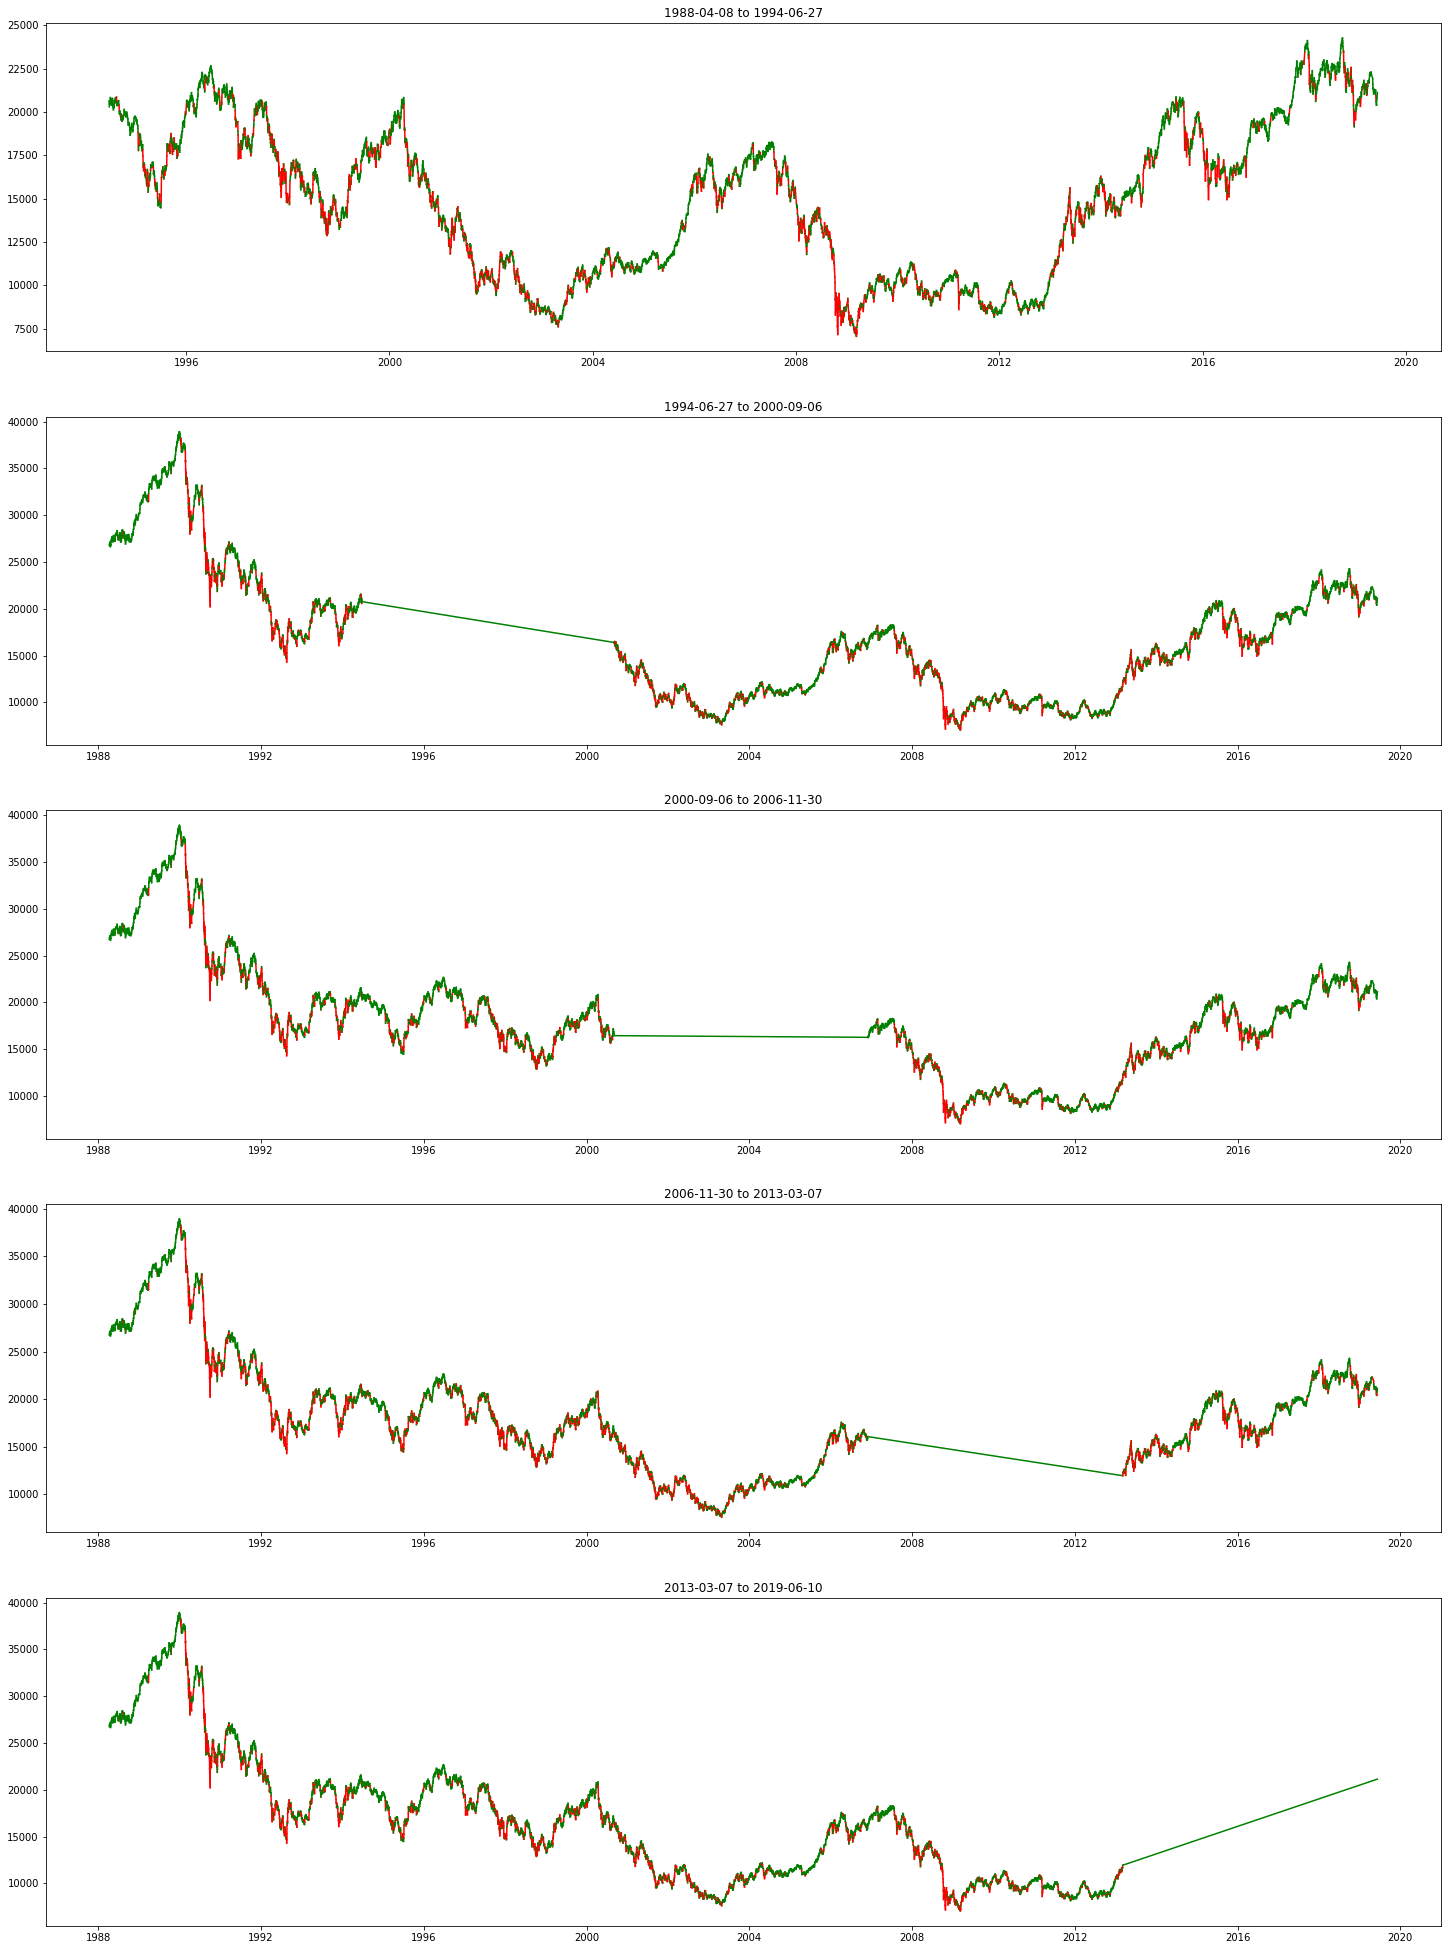

In [28]:
#plot close prices training
fig = plt.figure(figsize = (25, 35))
for i in range(5):
    plt.subplot(5,1,i+1)
    ret = structuring_data([slices[i],slices[i+1]], 0, record = False)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    mark1, mark2, mark3 = 0, 1, 2
    
    for i1 in range(1,len(ret[mark1])):#len(closes)-1):
        if ret[mark1][i1]==highvol_mark:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='r')
        else:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='g')
    plt.title('%.10s to %.10s'%(dates[slices[i]],dates[slices[i+1]]))
    print('Done!')

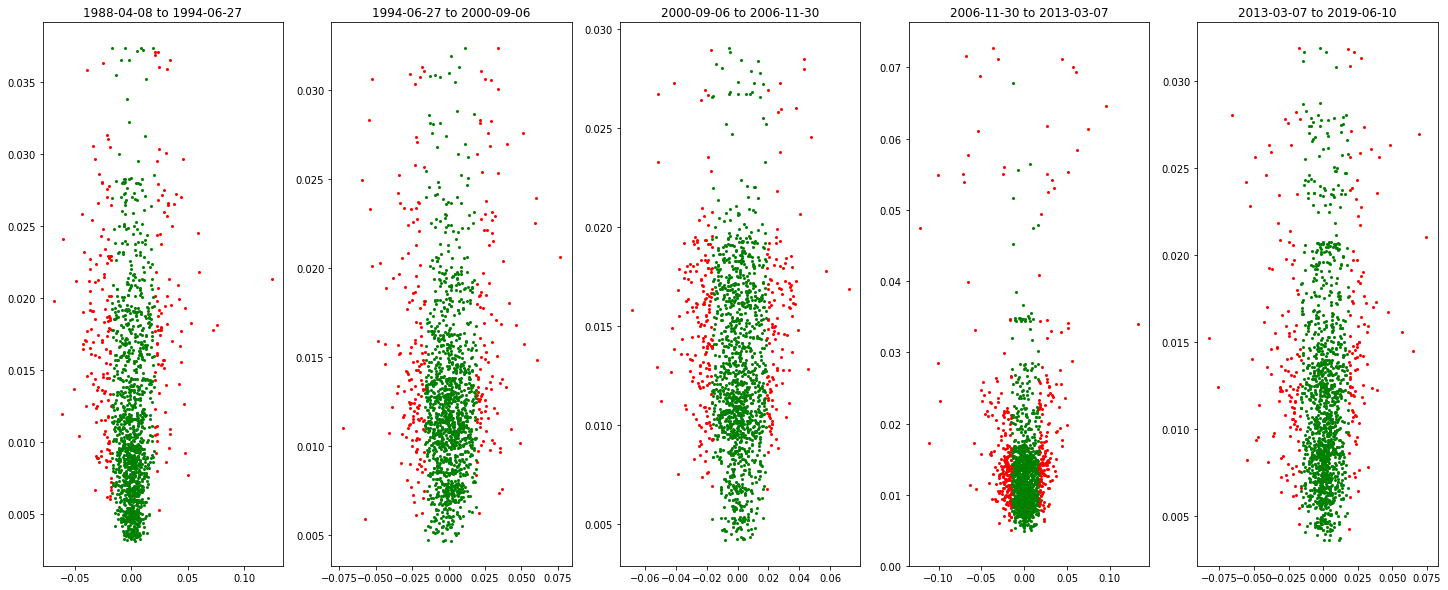

In [29]:
#plot logreturn/ vol scatter testing
fig = plt.figure(figsize = (25, 10))
for i in range(5):
    plt.subplot(1,5,i+1)
    ret = structuring_data([slices[i],slices[i+1]], 0, record = False)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    vollst = get_rolling_vol(20,ret[7])
    
    for i1 in range(20,len(ret[4])):
        if ret[4][i1]==highvol_mark:
            plt.scatter(ret[7][i1], vollst[i1], color='r', s=4)
        else:
            plt.scatter(ret[7][i1], vollst[i1], color='g', s=4)
    plt.title('%.10s to %.10s'%(dates[slices[i]],dates[slices[i+1]]))

Finished!
Finished!
Finished!
Finished!
Finished!


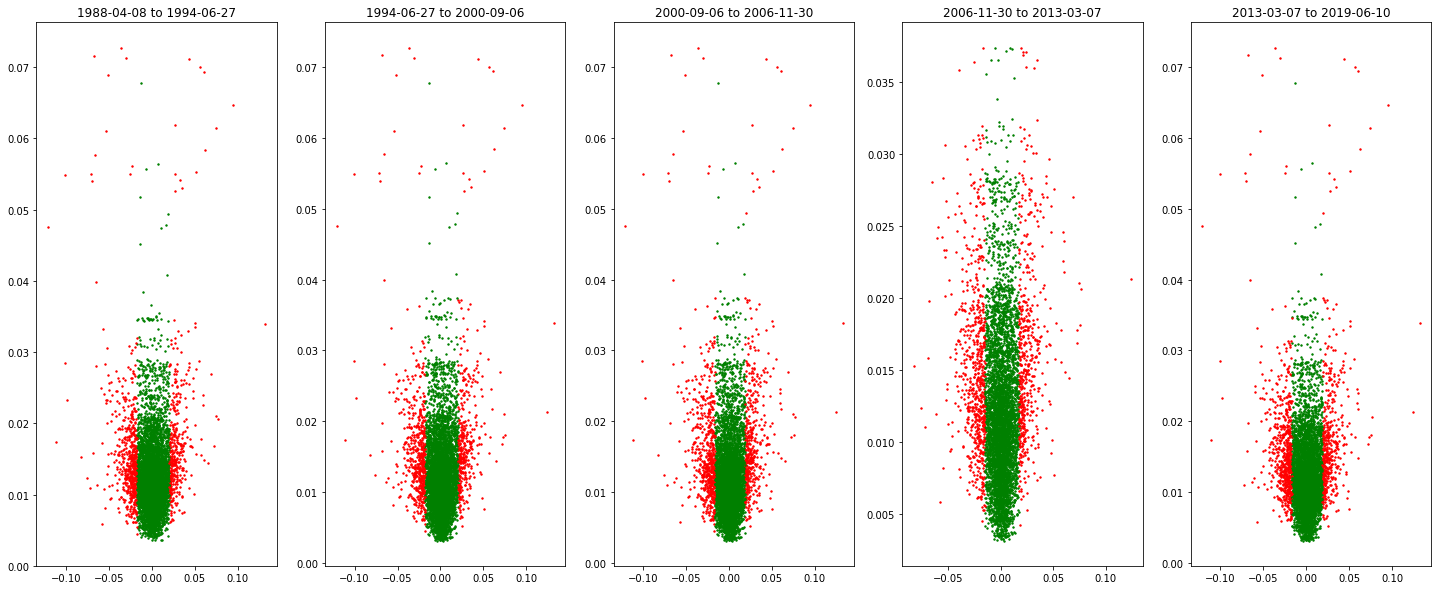

In [30]:
#plot logreturn/ vol scatter training
fig = plt.figure(figsize = (25, 10))
for i in range(5):
    plt.subplot(1,5,i+1)
    ret = structuring_data([slices[i],slices[i+1]], 0, record = False)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    vollst = get_rolling_vol(20,ret[3])
    
    for i1 in range(20,len(ret[0])):
        if ret[0][i1]==highvol_mark:
            plt.scatter(ret[3][i1], vollst[i1], color='r', s=2)
        else:
            plt.scatter(ret[3][i1], vollst[i1], color='g', s=2)
    plt.title('%.10s to %.10s'%(dates[slices[i]],dates[slices[i+1]]))
    print('Finished!')